In [39]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

set.seed(1)




options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

df <- df_finale


## Data partition

In [40]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [41]:
prop.table(table(test$deg_cat))


     fast   NotFast 
0.3491686 0.6508314 

In [42]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    491     491 

## Model

In [43]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [44]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 



+ Fold01.Rep1: nIter=85 
- Fold01.Rep1: nIter=85 
+ Fold02.Rep1: nIter=85 
- Fold02.Rep1: nIter=85 
+ Fold03.Rep1: nIter=85 
- Fold03.Rep1: nIter=85 
+ Fold04.Rep1: nIter=85 
- Fold04.Rep1: nIter=85 
+ Fold05.Rep1: nIter=85 
- Fold05.Rep1: nIter=85 
+ Fold06.Rep1: nIter=85 
- Fold06.Rep1: nIter=85 
+ Fold07.Rep1: nIter=85 
- Fold07.Rep1: nIter=85 
+ Fold08.Rep1: nIter=85 
- Fold08.Rep1: nIter=85 
+ Fold09.Rep1: nIter=85 
- Fold09.Rep1: nIter=85 
+ Fold10.Rep1: nIter=85 
- Fold10.Rep1: nIter=85 
Aggregating results
Selecting tuning parameters
Fitting nIter = 4 on full training set


In [45]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost=  0.01391, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=  0.01391, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost=771.45957, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=771.45957, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost= 78.97300, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost= 78.97300, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=  0.01391, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=  0.01391, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=771.45957, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=771.45957, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost= 78.97300, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost= 78.97300, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=  0.01391, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=  0.01391, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=771.45957, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=771.45957, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost= 78.97300, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost= 78.97300, loss=L2_dual, eps

## Results

Boosted Logistic Regression 

982 samples
 73 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 884, 884, 884, 884, 884, 884, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
   4     0.7845263  0.5593564
  55     0.6976809  0.3952659
  85     0.6925788  0.3852482

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 4.


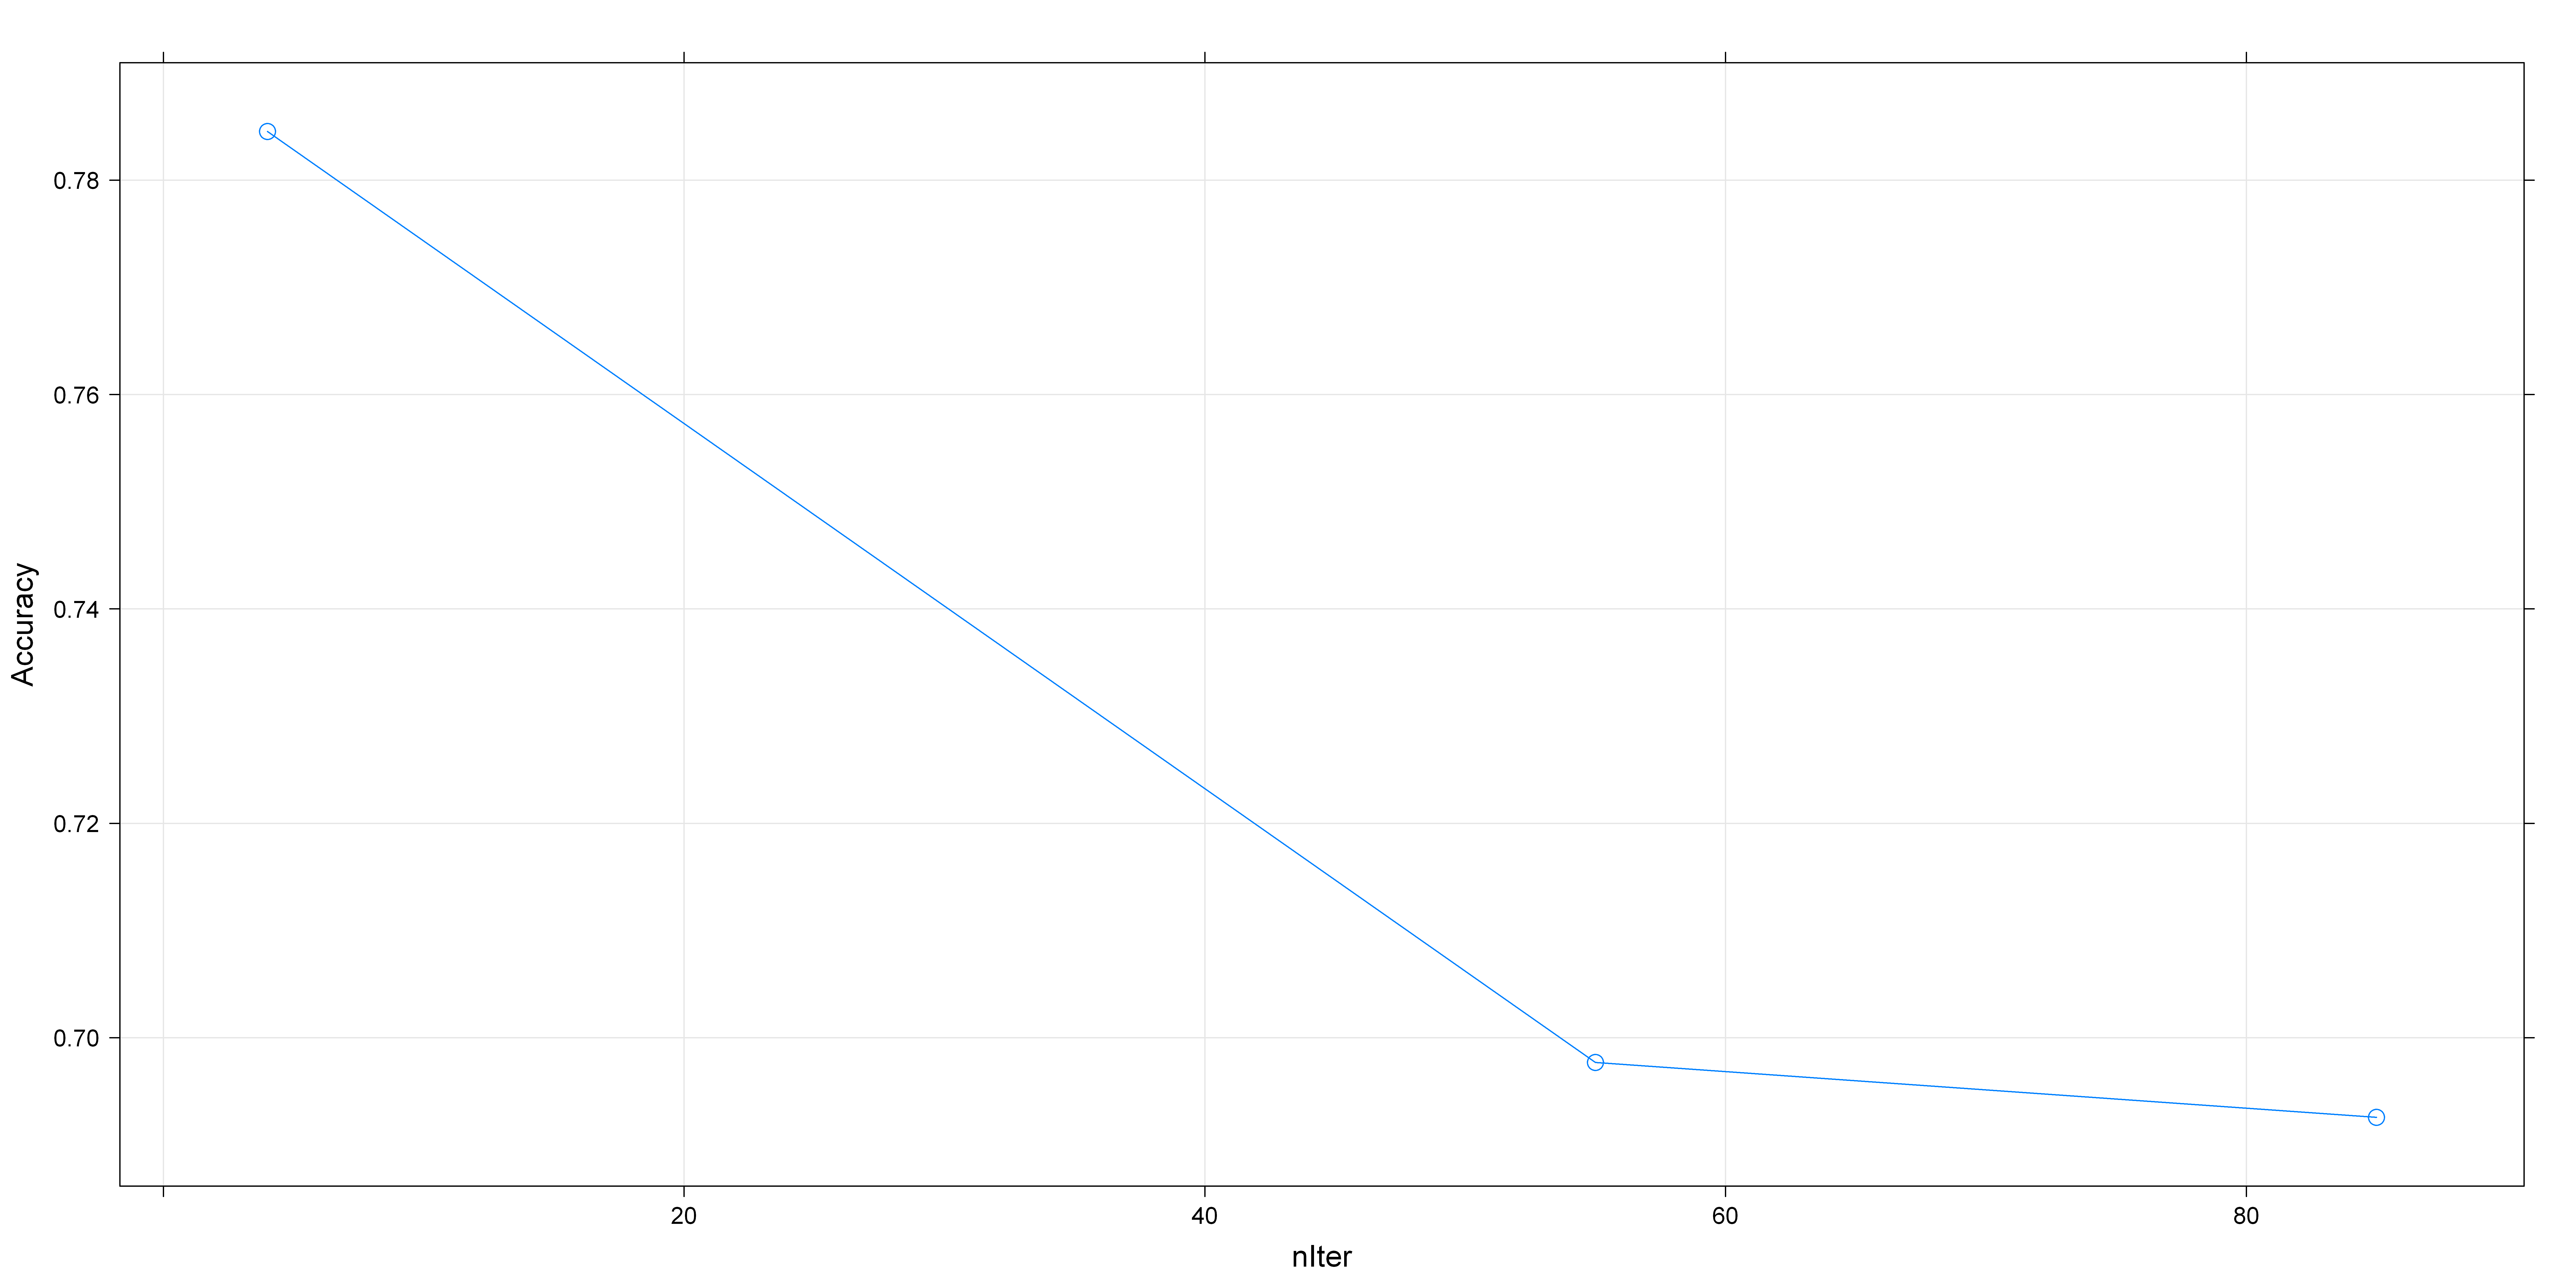

In [46]:
print(model_logitBoost)
plot(model_logitBoost,  cex= 1.5,  xlab = list( cex = 1.4), ylab = list( cex = 1.4), scales = list(x = list(cex=1.1),y=list(cex=1.1)))

Regularized Logistic Regression 

982 samples
 73 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 884, 884, 884, 884, 884, 883, ... 
Resampling results across tuning parameters:

  cost          Accuracy   Kappa    
    0.01391071  0.7249948  0.4501553
   78.97299923  0.7149041  0.4299497
  771.45957075  0.7006184  0.4013363

Tuning parameter 'loss' was held constant at a value of L2_dual

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.01391071, loss = L2_dual
 and epsilon = 1.


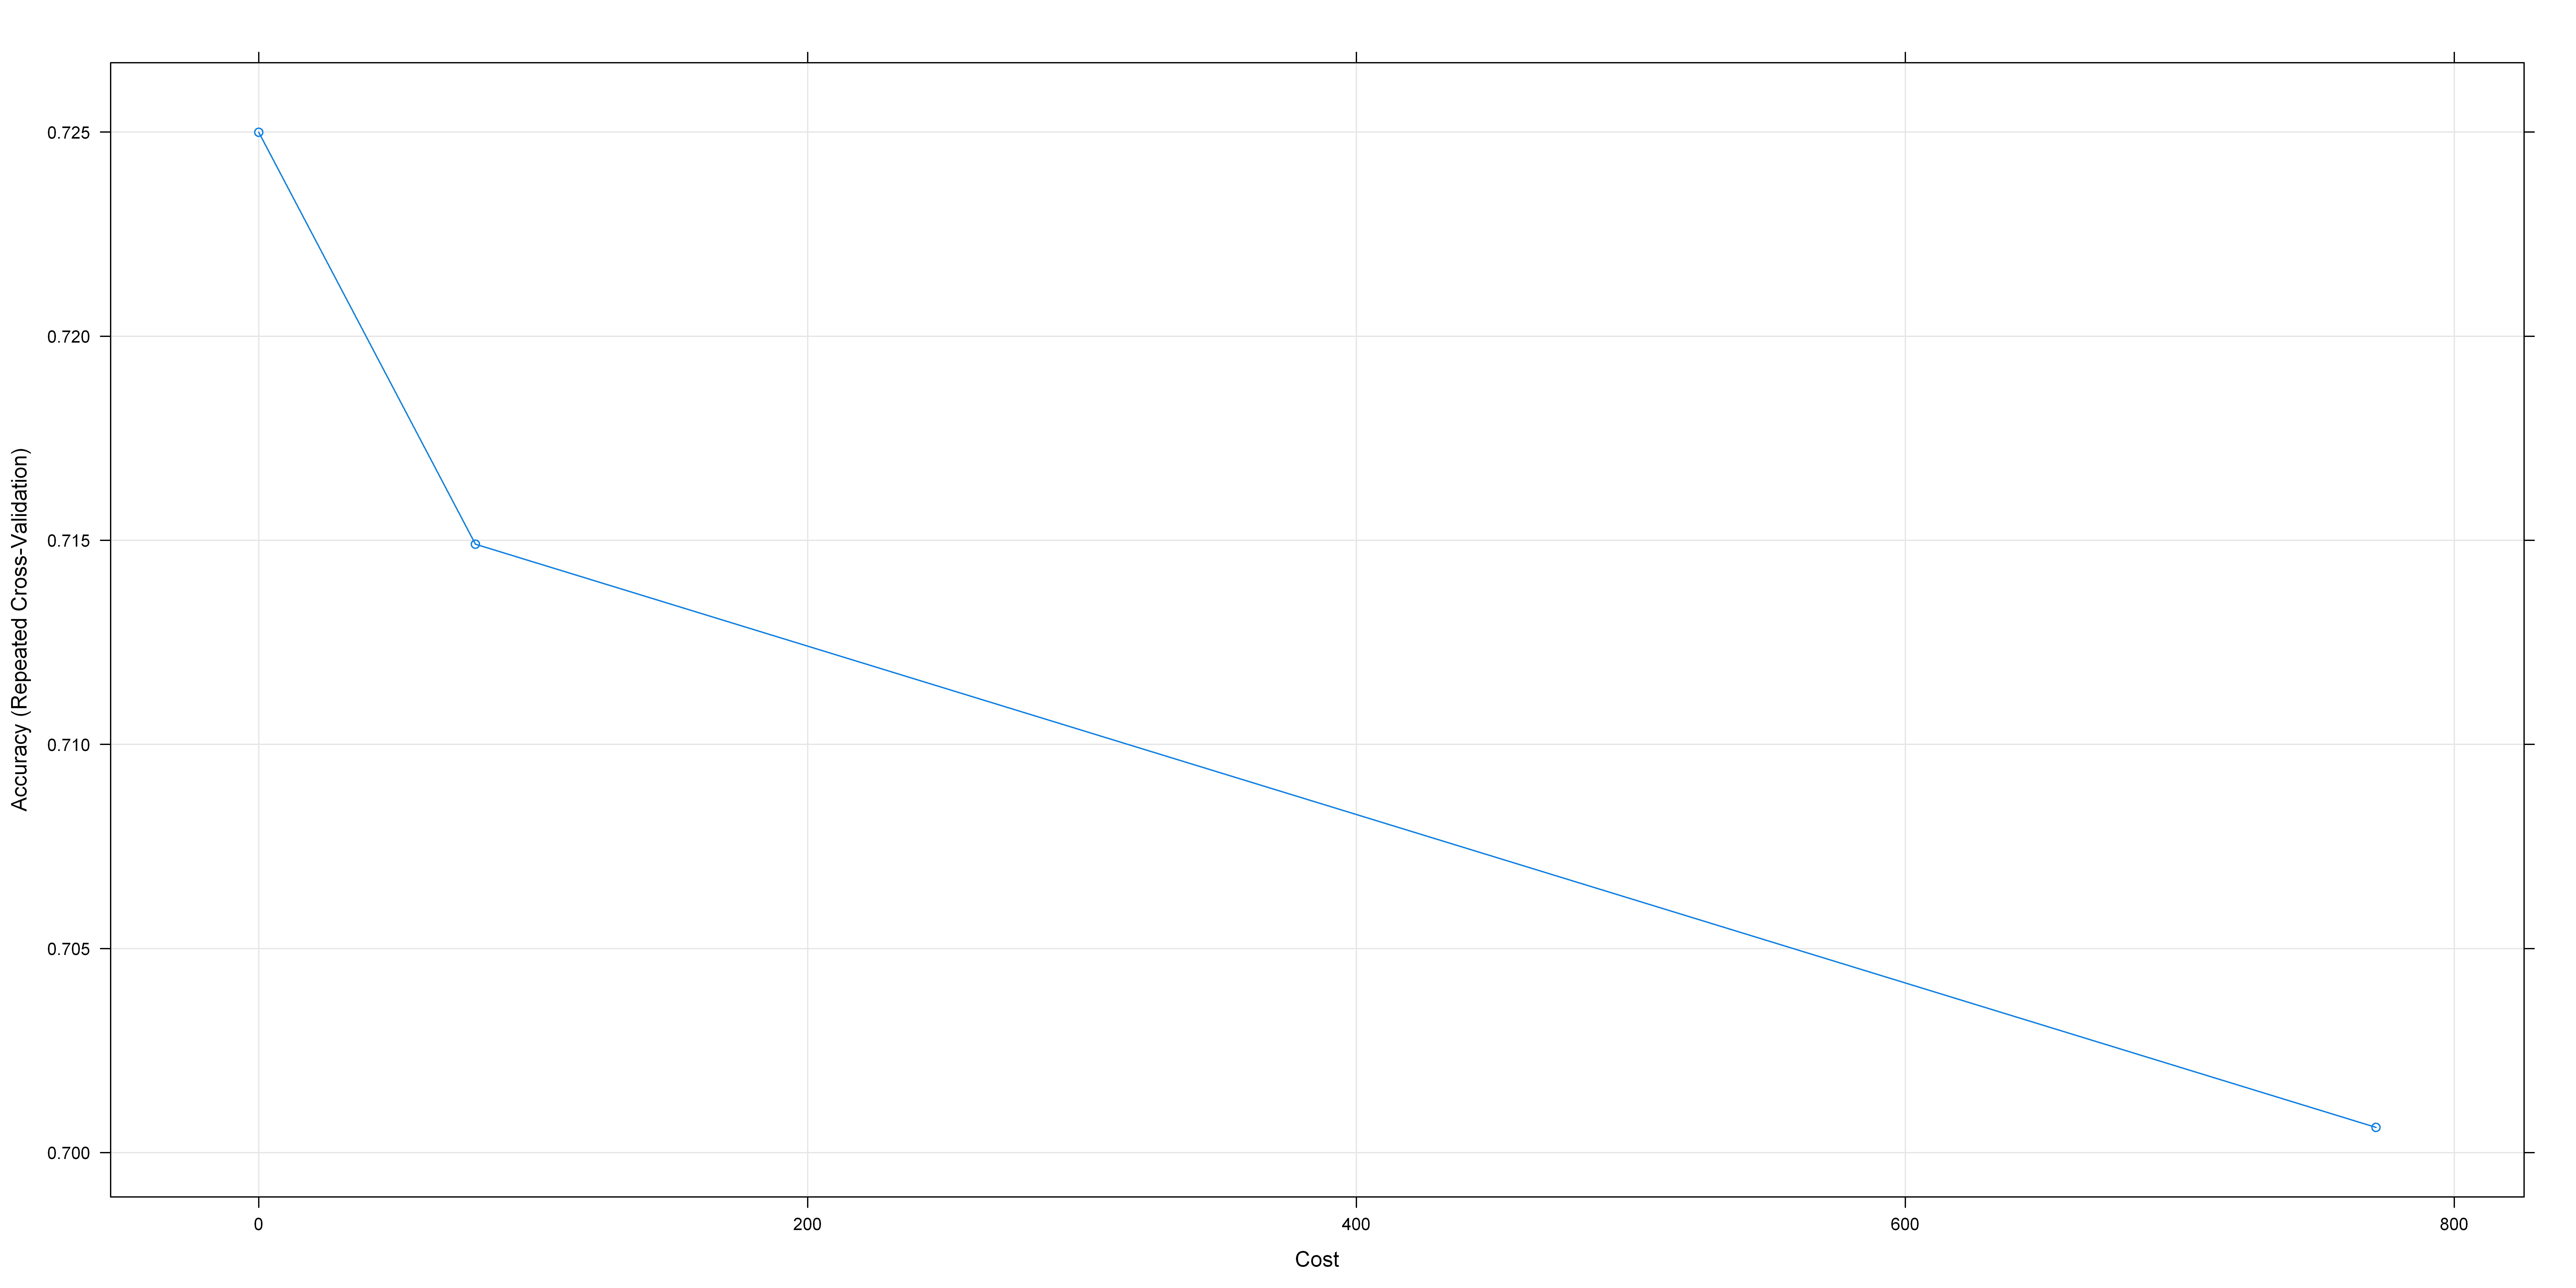

In [47]:
print(model_regLogistic)
plot(model_regLogistic)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.6833333 0.7306548 0.8044118 0.7845263 0.8381661 0.8750000    0
regLogistic 0.6326531 0.6734694 0.7360338 0.7249948 0.7653061 0.8367347    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.3478261 0.4266027 0.6037300 0.5593564 0.6762487 0.7408907    0
regLogistic 0.2653061 0.3469388 0.4726825 0.4501553 0.5306122 0.6734694    0


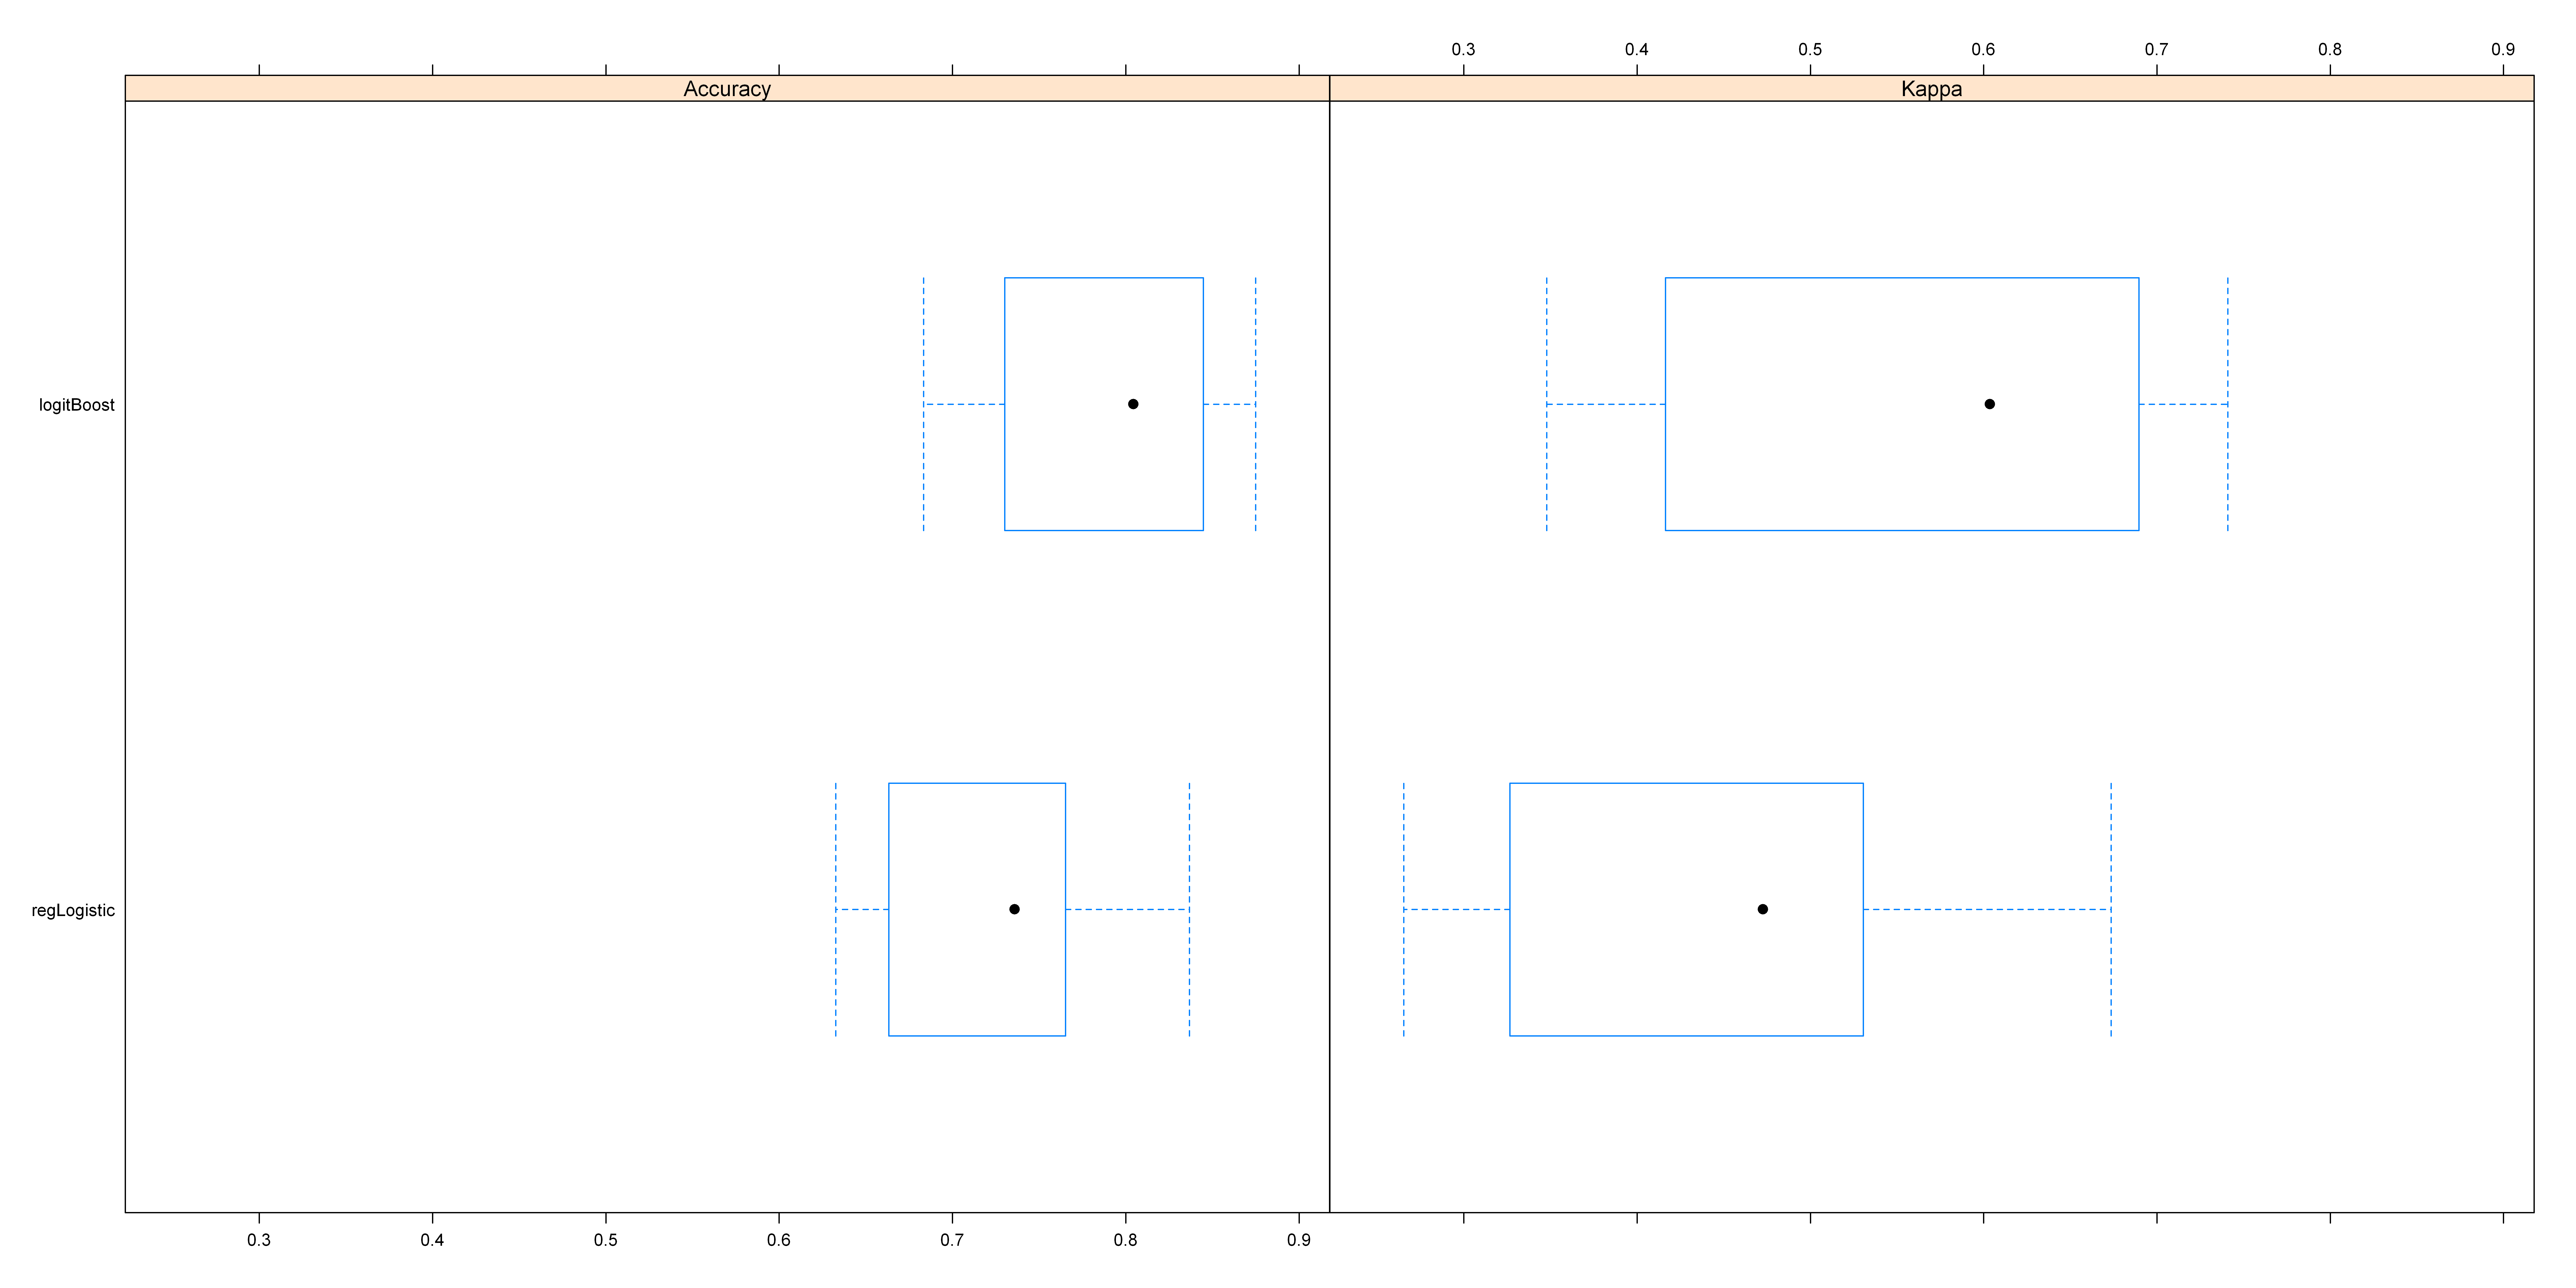

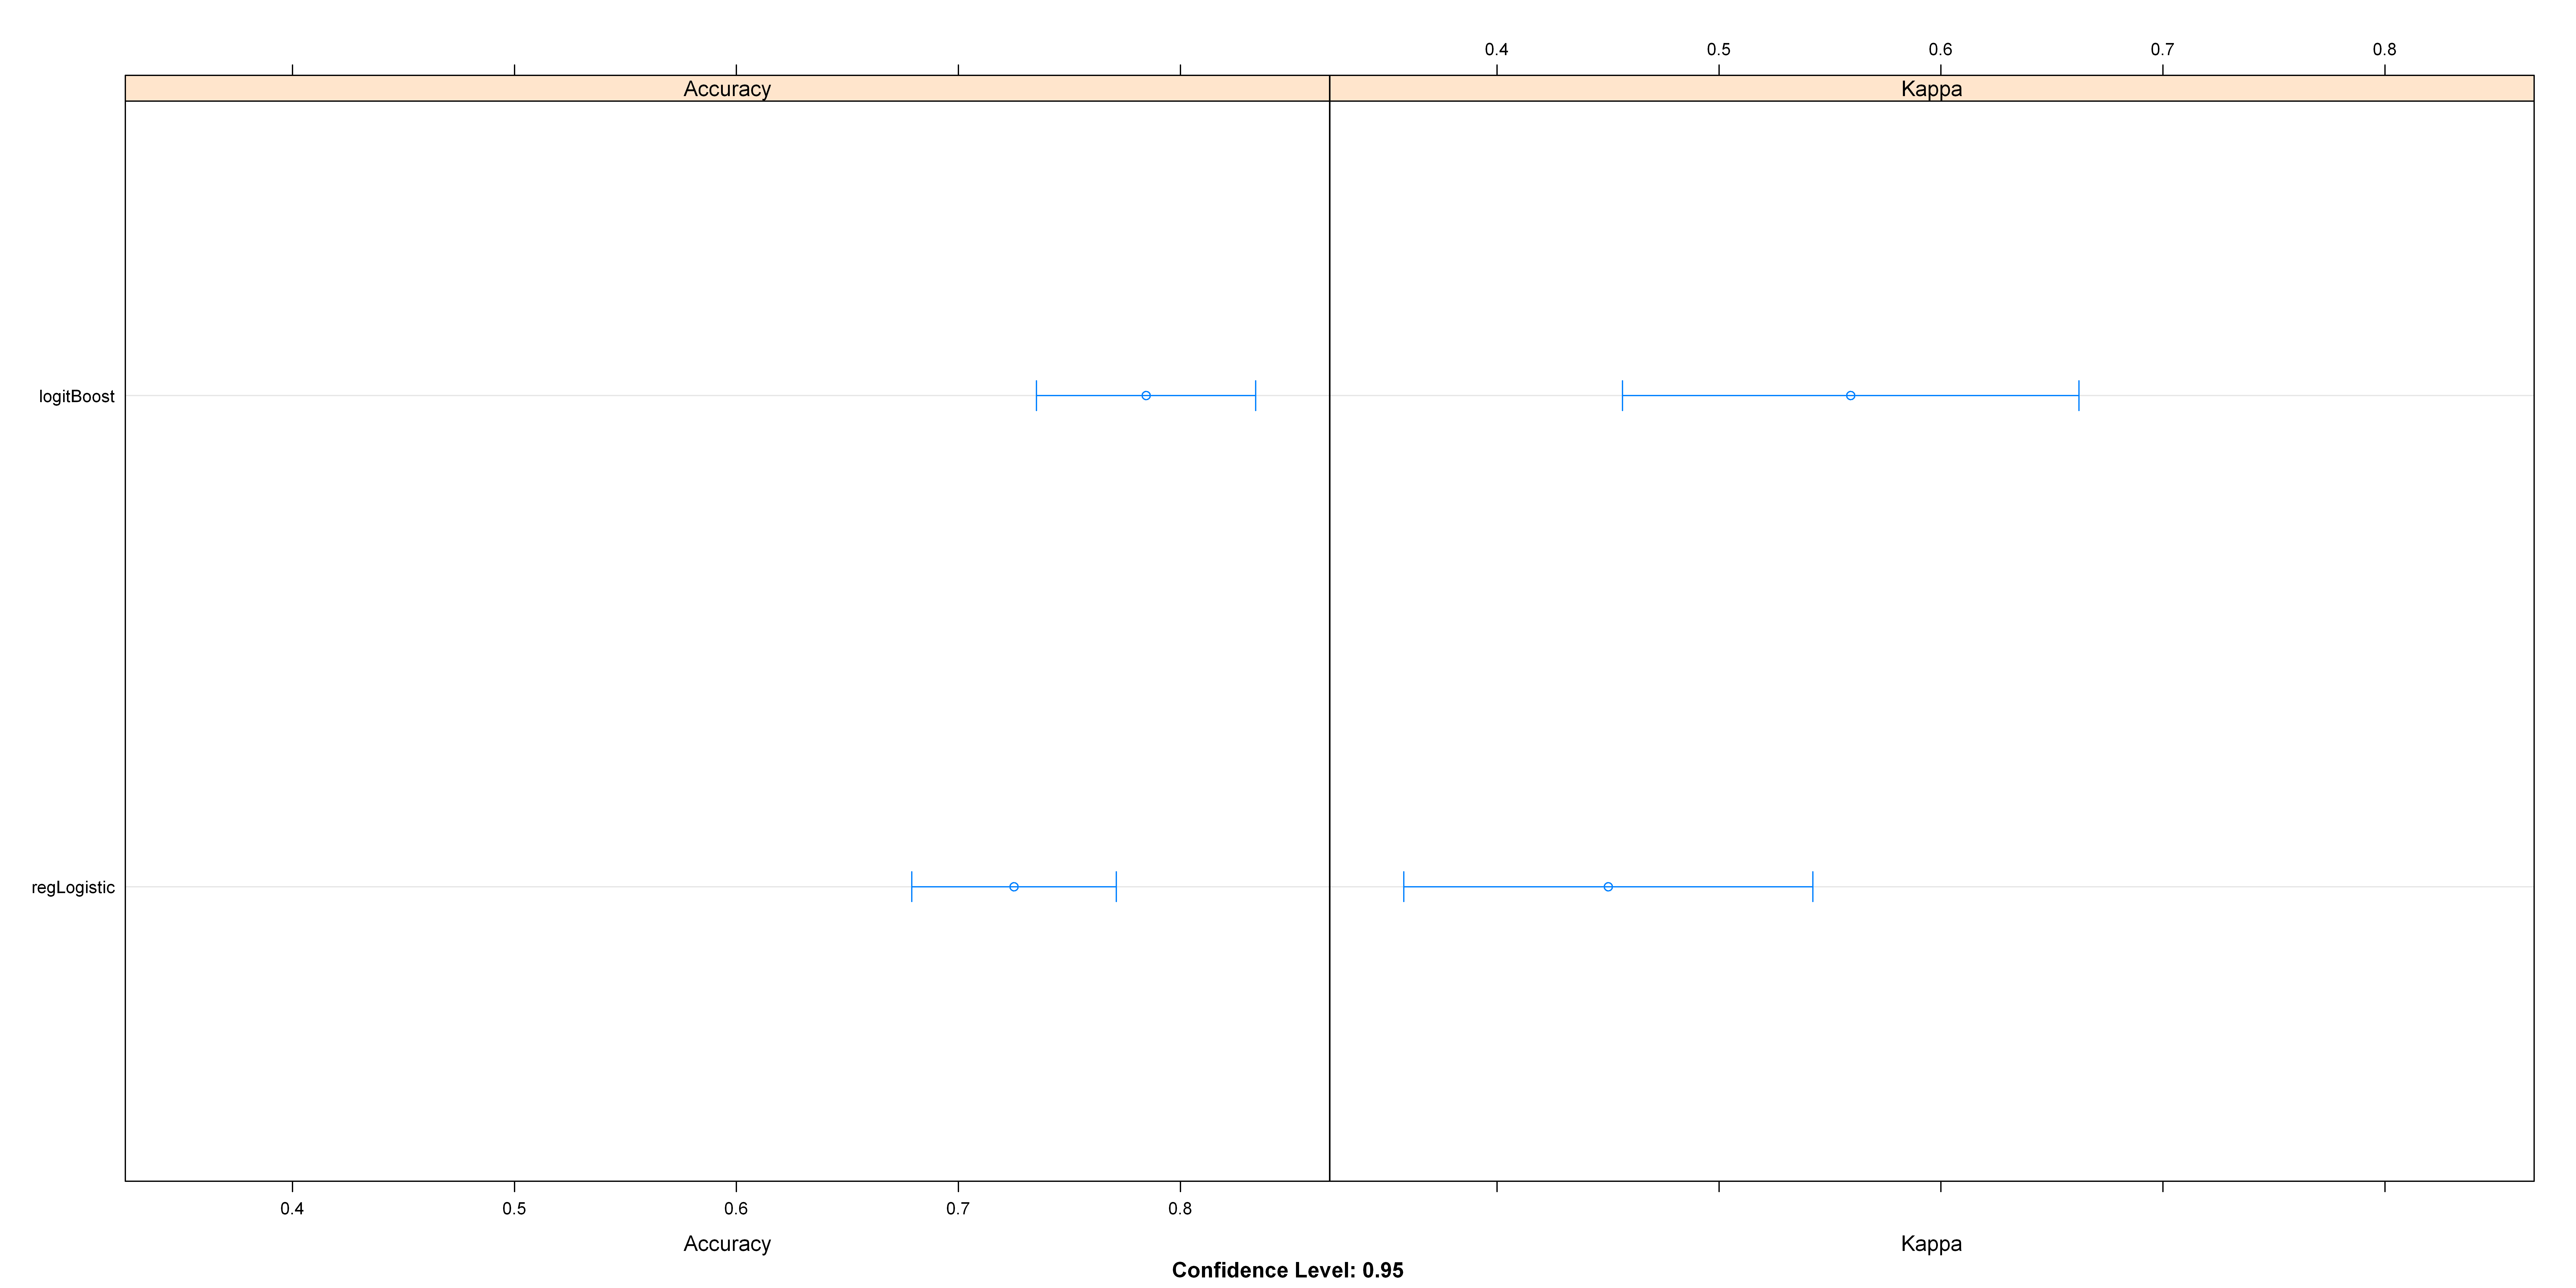

In [48]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [49]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      65      21
   NotFast   57     111
                                          
               Accuracy : 0.6929          
                 95% CI : (0.6322, 0.7491)
    No Information Rate : 0.5197          
    P-Value [Acc > NIR] : 1.488e-08       
                                          
                  Kappa : 0.3779          
                                          
 Mcnemar's Test P-Value : 7.402e-05       
                                          
            Sensitivity : 0.5328          
            Specificity : 0.8409          
         Pos Pred Value : 0.7558          
         Neg Pred Value : 0.6607          
             Prevalence : 0.4803          
         Detection Rate : 0.2559          
   Detection Prevalence : 0.3386          
      Balanced Accuracy : 0.6868          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5327869            0.8409091            0.7558140 
      Neg Pred Value            Precision               Recall 
           0.6607143            0.7558140            0.5327869 
                  F1           Prevalence       Detection Rate 
           0.6250000            0.4803150            0.2559055 
Detection Prevalence    Balanced Accuracy 
           0.3385827            0.6868480

In [50]:
pred_regLogistic <- predict(model_regLogistic,test)  
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast     106      41
   NotFast   65     209
                                         
               Accuracy : 0.7482         
                 95% CI : (0.7039, 0.789)
    No Information Rate : 0.5938         
    P-Value [Acc > NIR] : 2.174e-11      
                                         
                  Kappa : 0.4662         
                                         
 Mcnemar's Test P-Value : 0.02549        
                                         
            Sensitivity : 0.6199         
            Specificity : 0.8360         
         Pos Pred Value : 0.7211         
         Neg Pred Value : 0.7628         
             Prevalence : 0.4062         
         Detection Rate : 0.2518         
   Detection Prevalence : 0.3492         
      Balanced Accuracy : 0.7279         
                                         
       'Positive' Class : fast           
                                   

Sensitivity          Specificity       Pos Pred Value 
           0.6198830            0.8360000            0.7210884 
      Neg Pred Value            Precision               Recall 
           0.7627737            0.7210884            0.6198830 
                  F1           Prevalence       Detection Rate 
           0.6666667            0.4061758            0.2517815 
Detection Prevalence    Balanced Accuracy 
           0.3491686            0.7279415

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



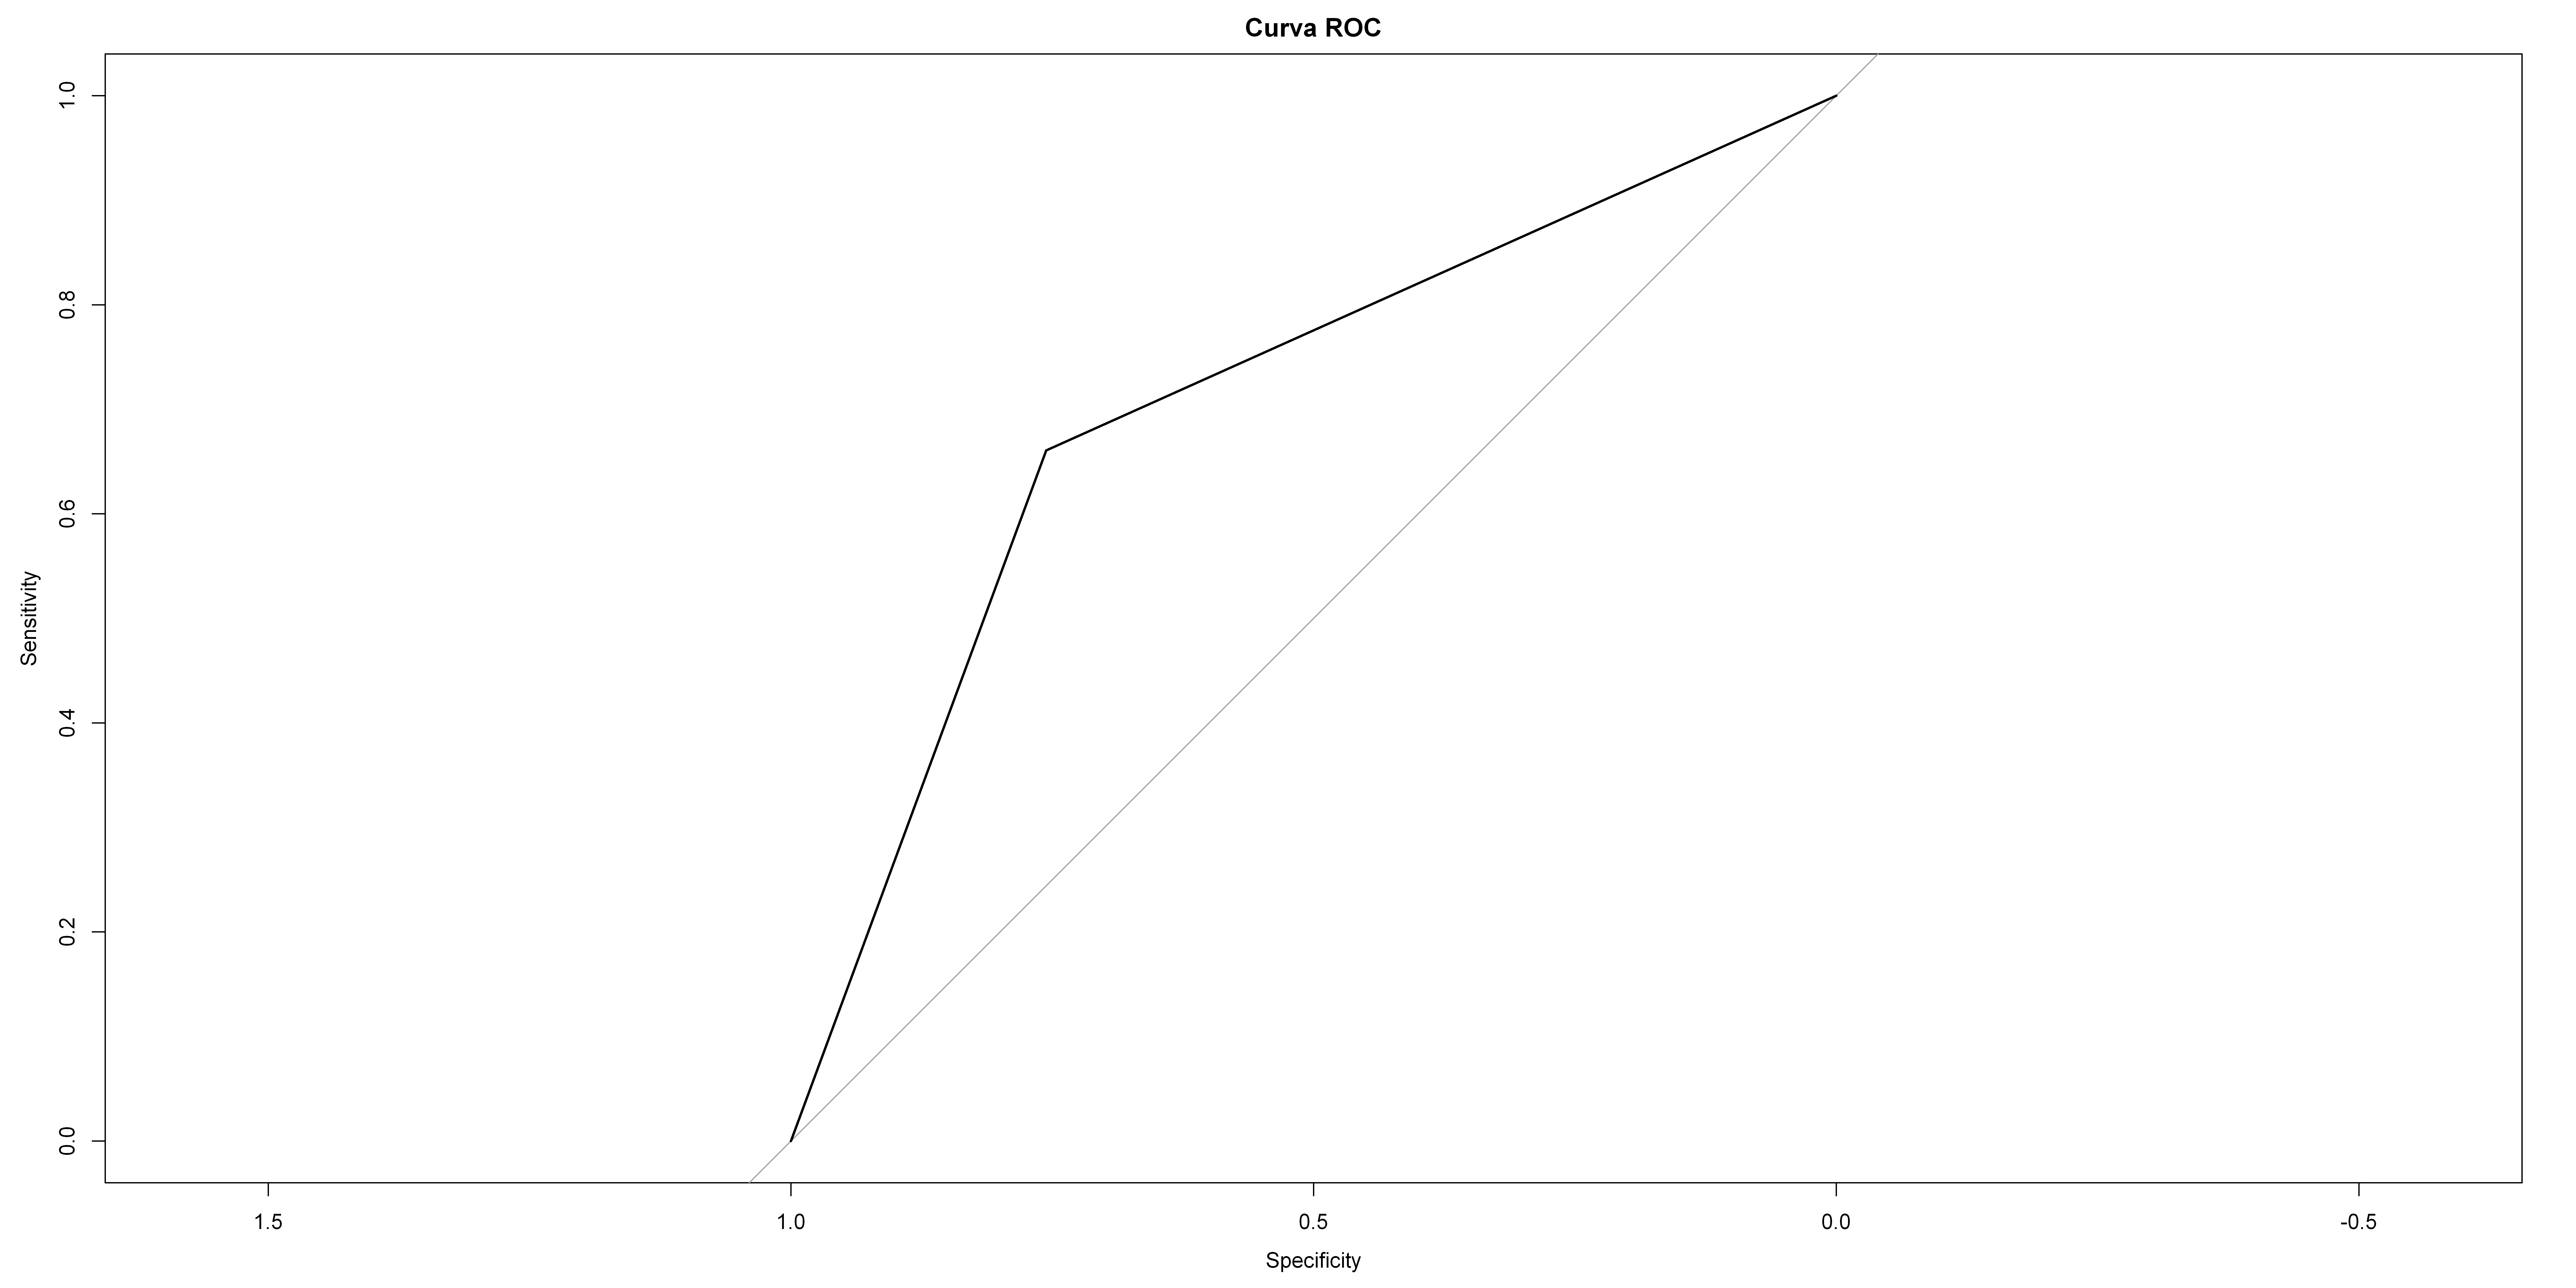

In [51]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [52]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 86 controls (TestClasses fast) < 168 cases (TestClasses NotFast).
Area under the curve: 0.7083

In [53]:
pred_logitBoost.prob

fast,NotFast
0.5000000,0.50000000
0.9820138,0.01798621
0.5000000,0.50000000
0.1192029,0.88079708
0.5000000,0.50000000
0.8807971,0.11920292
0.5000000,0.50000000
0.8807971,0.11920292
0.5000000,0.50000000
0.5000000,0.50000000


# Regressione logistica con variabili boruta

In [54]:
df_boruta <- subset(df, select=c(centreCode, degenzaPreTra, presentRefractAscites, nutritStatus, albumInfusOver7Days,
                                 ratioPaO2FiO2, platCountTranspl, albumina, surgeryDuration, IntraoperativTransfected,
                                 plasmaFresco, plasmaPools, CRIOprecipitated, CristalloidiComp, Albumina50Comp,
                                 noradrenalineEndSurger, intermedLactates, syndromeReperfus, abdomOpenEndSurg,
                                 organDonorDrawalSodiemia, realMELDNa, comorbidities_none_RIC, new_admWard, EPScum,deg_cat))

In [55]:



sample <- sample.split(df_boruta$deg_cat, SplitRatio = 0.7)
train  <- subset(df_boruta, sample == TRUE)
test   <- subset(df_boruta, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [56]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    491     491 

In [57]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [58]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)  

+ Fold01.Rep1: cost= 0.009777, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost= 0.009777, loss=L2_primal, epsilon=1 
+ Fold01.Rep1: cost= 0.001813, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost= 0.001813, loss=L2_primal, epsilon=1 
+ Fold01.Rep1: cost=42.801039, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost=42.801039, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost= 0.009777, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost= 0.009777, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost= 0.001813, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost= 0.001813, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost=42.801039, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost=42.801039, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost= 0.009777, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost= 0.009777, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost= 0.001813, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost= 0.001813, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost=42.801039, loss=L2_primal, epsilon=1 
- Fold03.Rep1:

In [59]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 


+ Fold01.Rep1: nIter=78 
- Fold01.Rep1: nIter=78 
+ Fold02.Rep1: nIter=78 
- Fold02.Rep1: nIter=78 
+ Fold03.Rep1: nIter=78 
- Fold03.Rep1: nIter=78 
+ Fold04.Rep1: nIter=78 
- Fold04.Rep1: nIter=78 
+ Fold05.Rep1: nIter=78 
- Fold05.Rep1: nIter=78 
+ Fold06.Rep1: nIter=78 
- Fold06.Rep1: nIter=78 
+ Fold07.Rep1: nIter=78 
- Fold07.Rep1: nIter=78 
+ Fold08.Rep1: nIter=78 
- Fold08.Rep1: nIter=78 
+ Fold09.Rep1: nIter=78 
- Fold09.Rep1: nIter=78 
+ Fold10.Rep1: nIter=78 
- Fold10.Rep1: nIter=78 
Aggregating results
Selecting tuning parameters
Fitting nIter = 34 on full training set


Regularized Logistic Regression 

982 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 884, 884, 884, 884, 883, 884, ... 
Resampling results across tuning parameters:

  cost          Accuracy   Kappa    
   0.001812989  0.7138837  0.4276358
   0.009777034  0.7251495  0.4502427
  42.801039436  0.7362915  0.4725714

Tuning parameter 'loss' was held constant at a value of L2_primal

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 42.80104, loss = L2_primal
 and epsilon = 1.


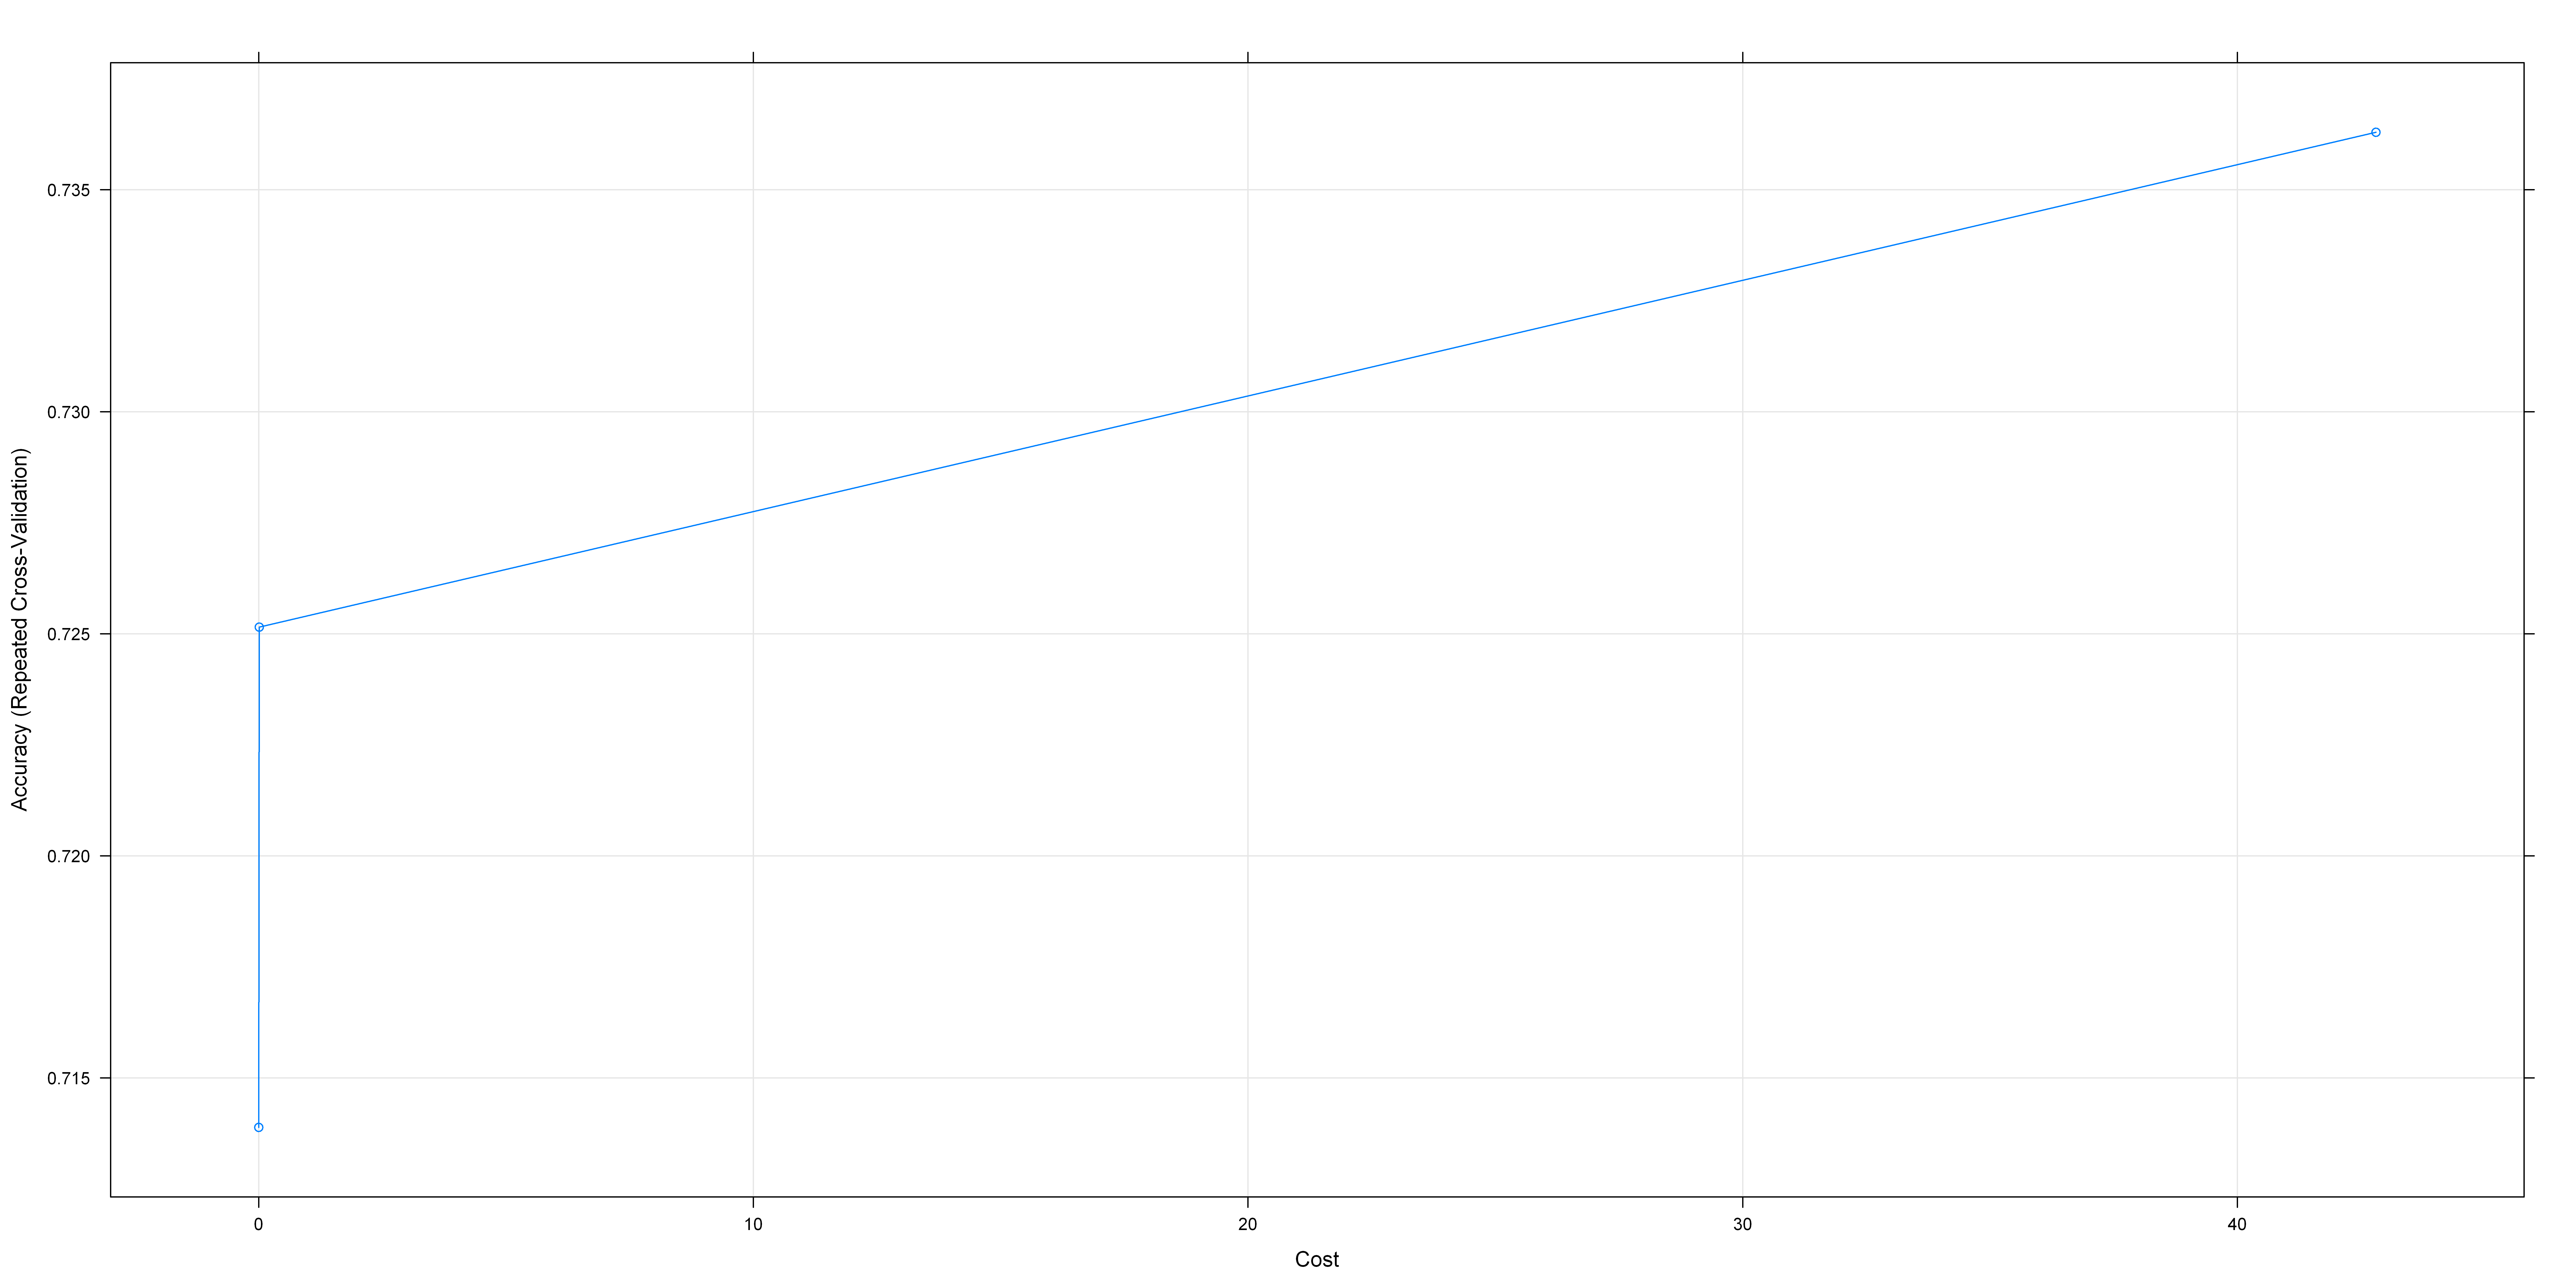

In [60]:
print(model_regLogistic)
plot(model_regLogistic)

Boosted Logistic Regression 

982 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 884, 884, 884, 883, 884, 884, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  34     0.7660093  0.5325502
  50     0.7646235  0.5266167
  78     0.7631852  0.5240680

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 34.


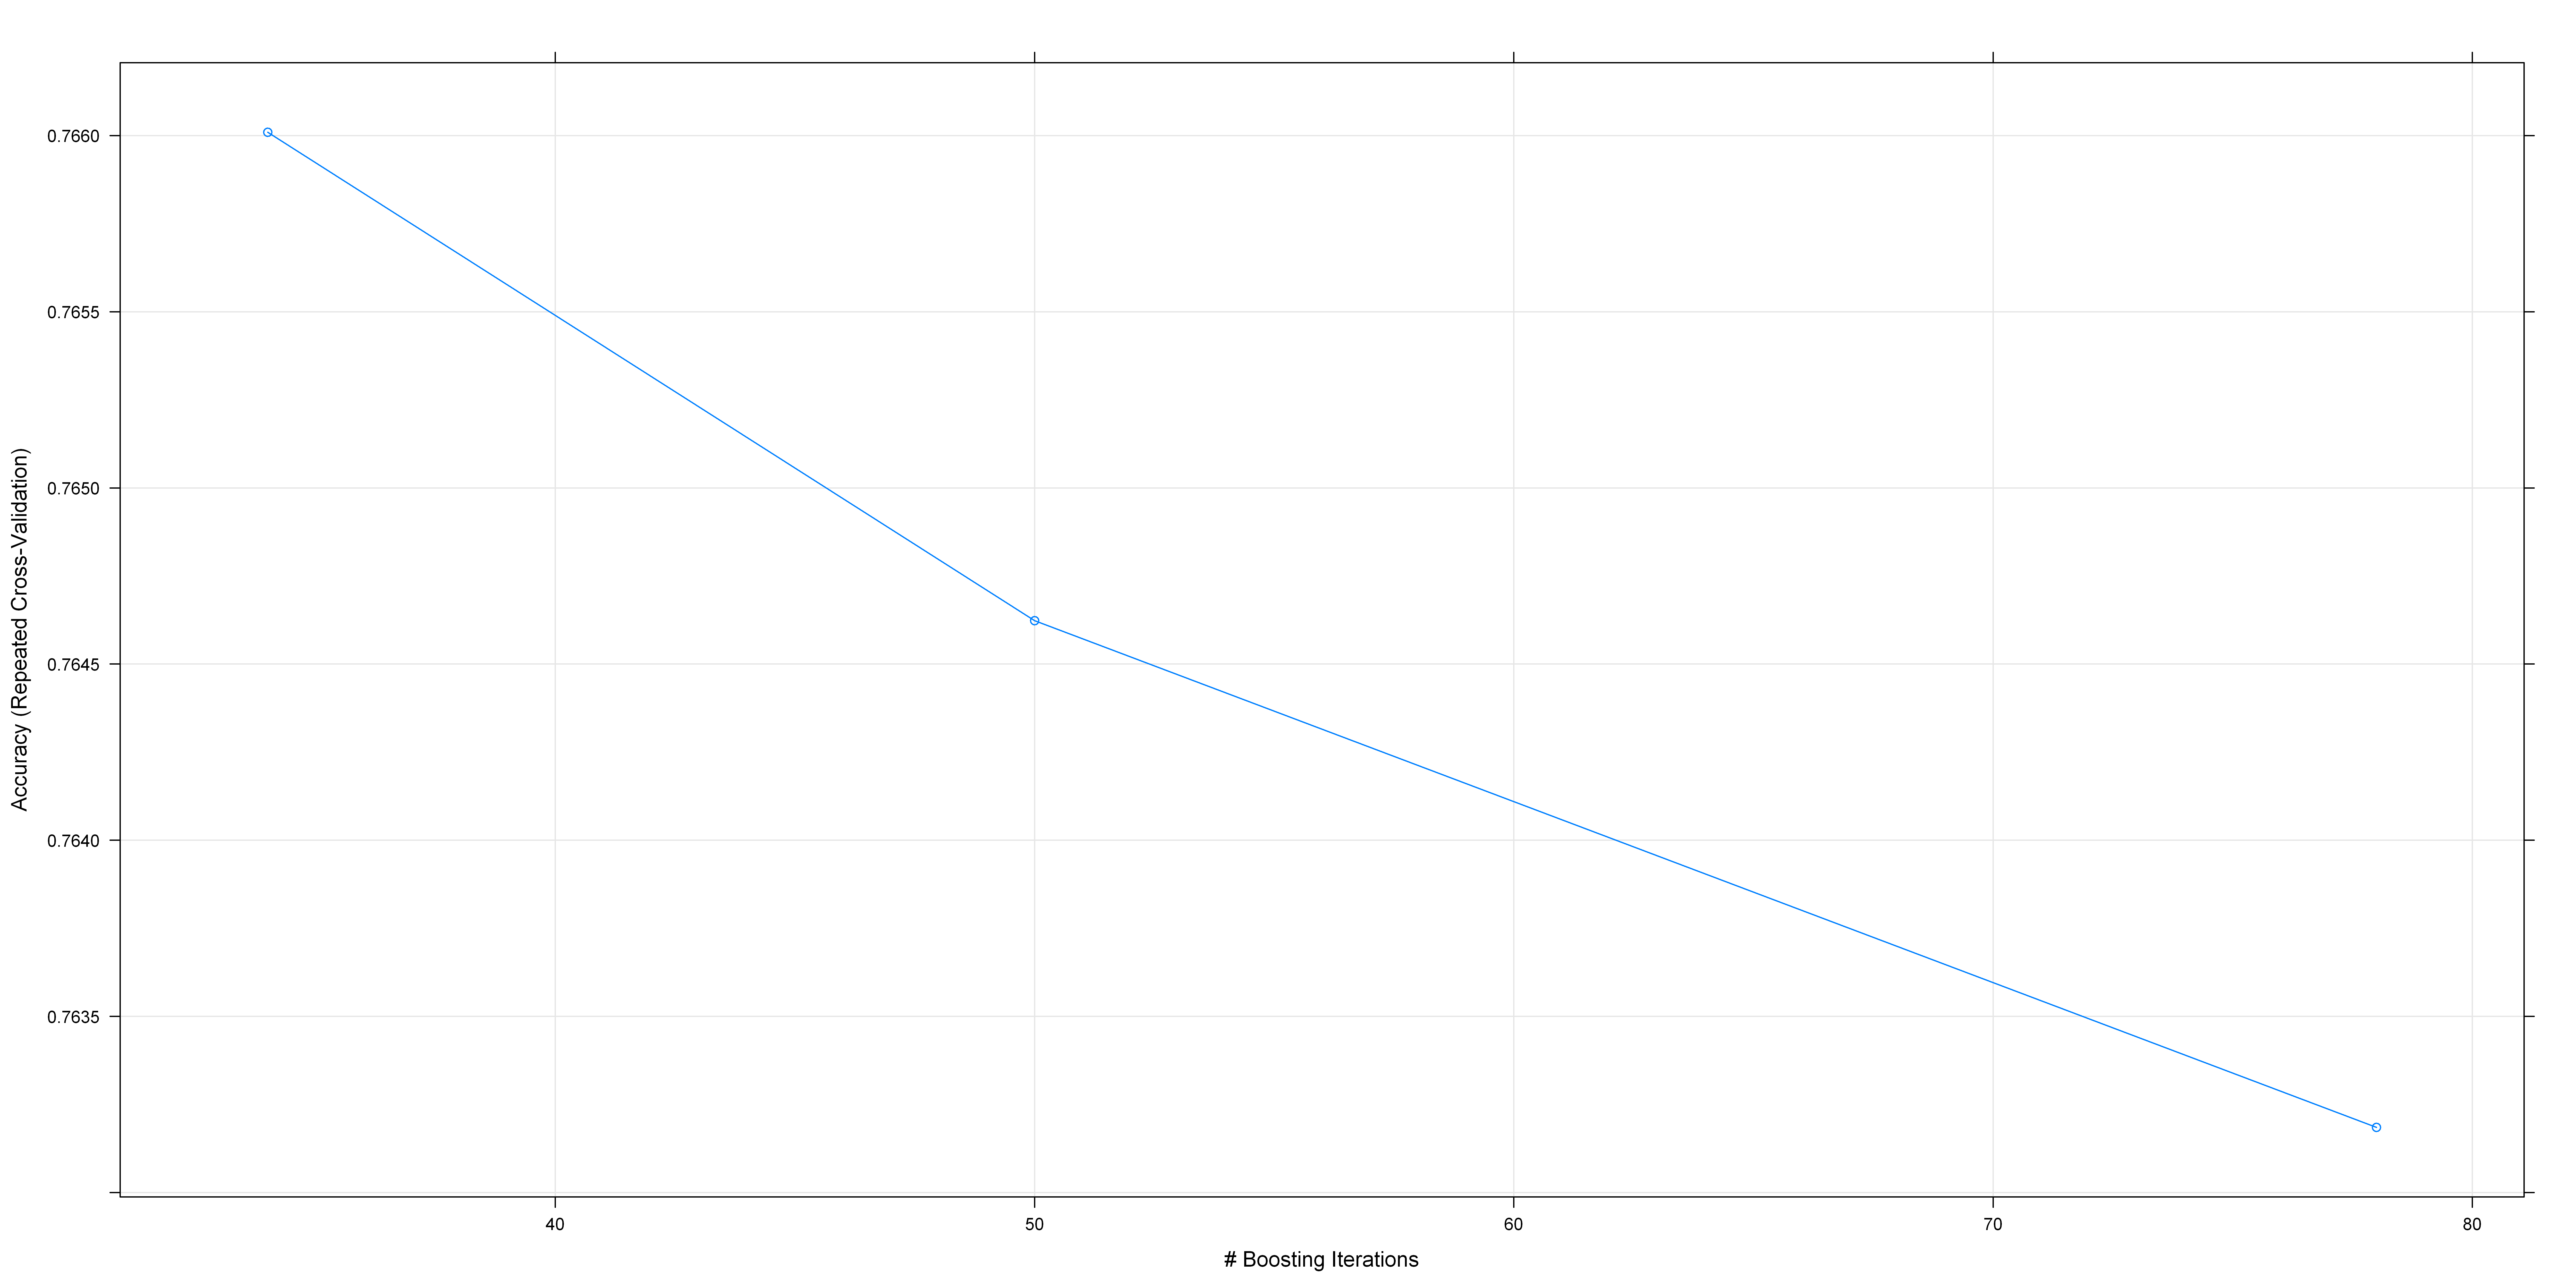

In [61]:
print(model_logitBoost)
plot(model_logitBoost)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.6875000 0.7211899 0.7543843 0.7660093 0.8162466 0.8382353    0
regLogistic 0.6464646 0.7091837 0.7448980 0.7362915 0.7780612 0.7959184    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.3846154 0.4427965 0.5085990 0.5325502 0.6319789 0.6764706    0
regLogistic 0.2924239 0.4183673 0.4897959 0.4725714 0.5561224 0.5918367    0


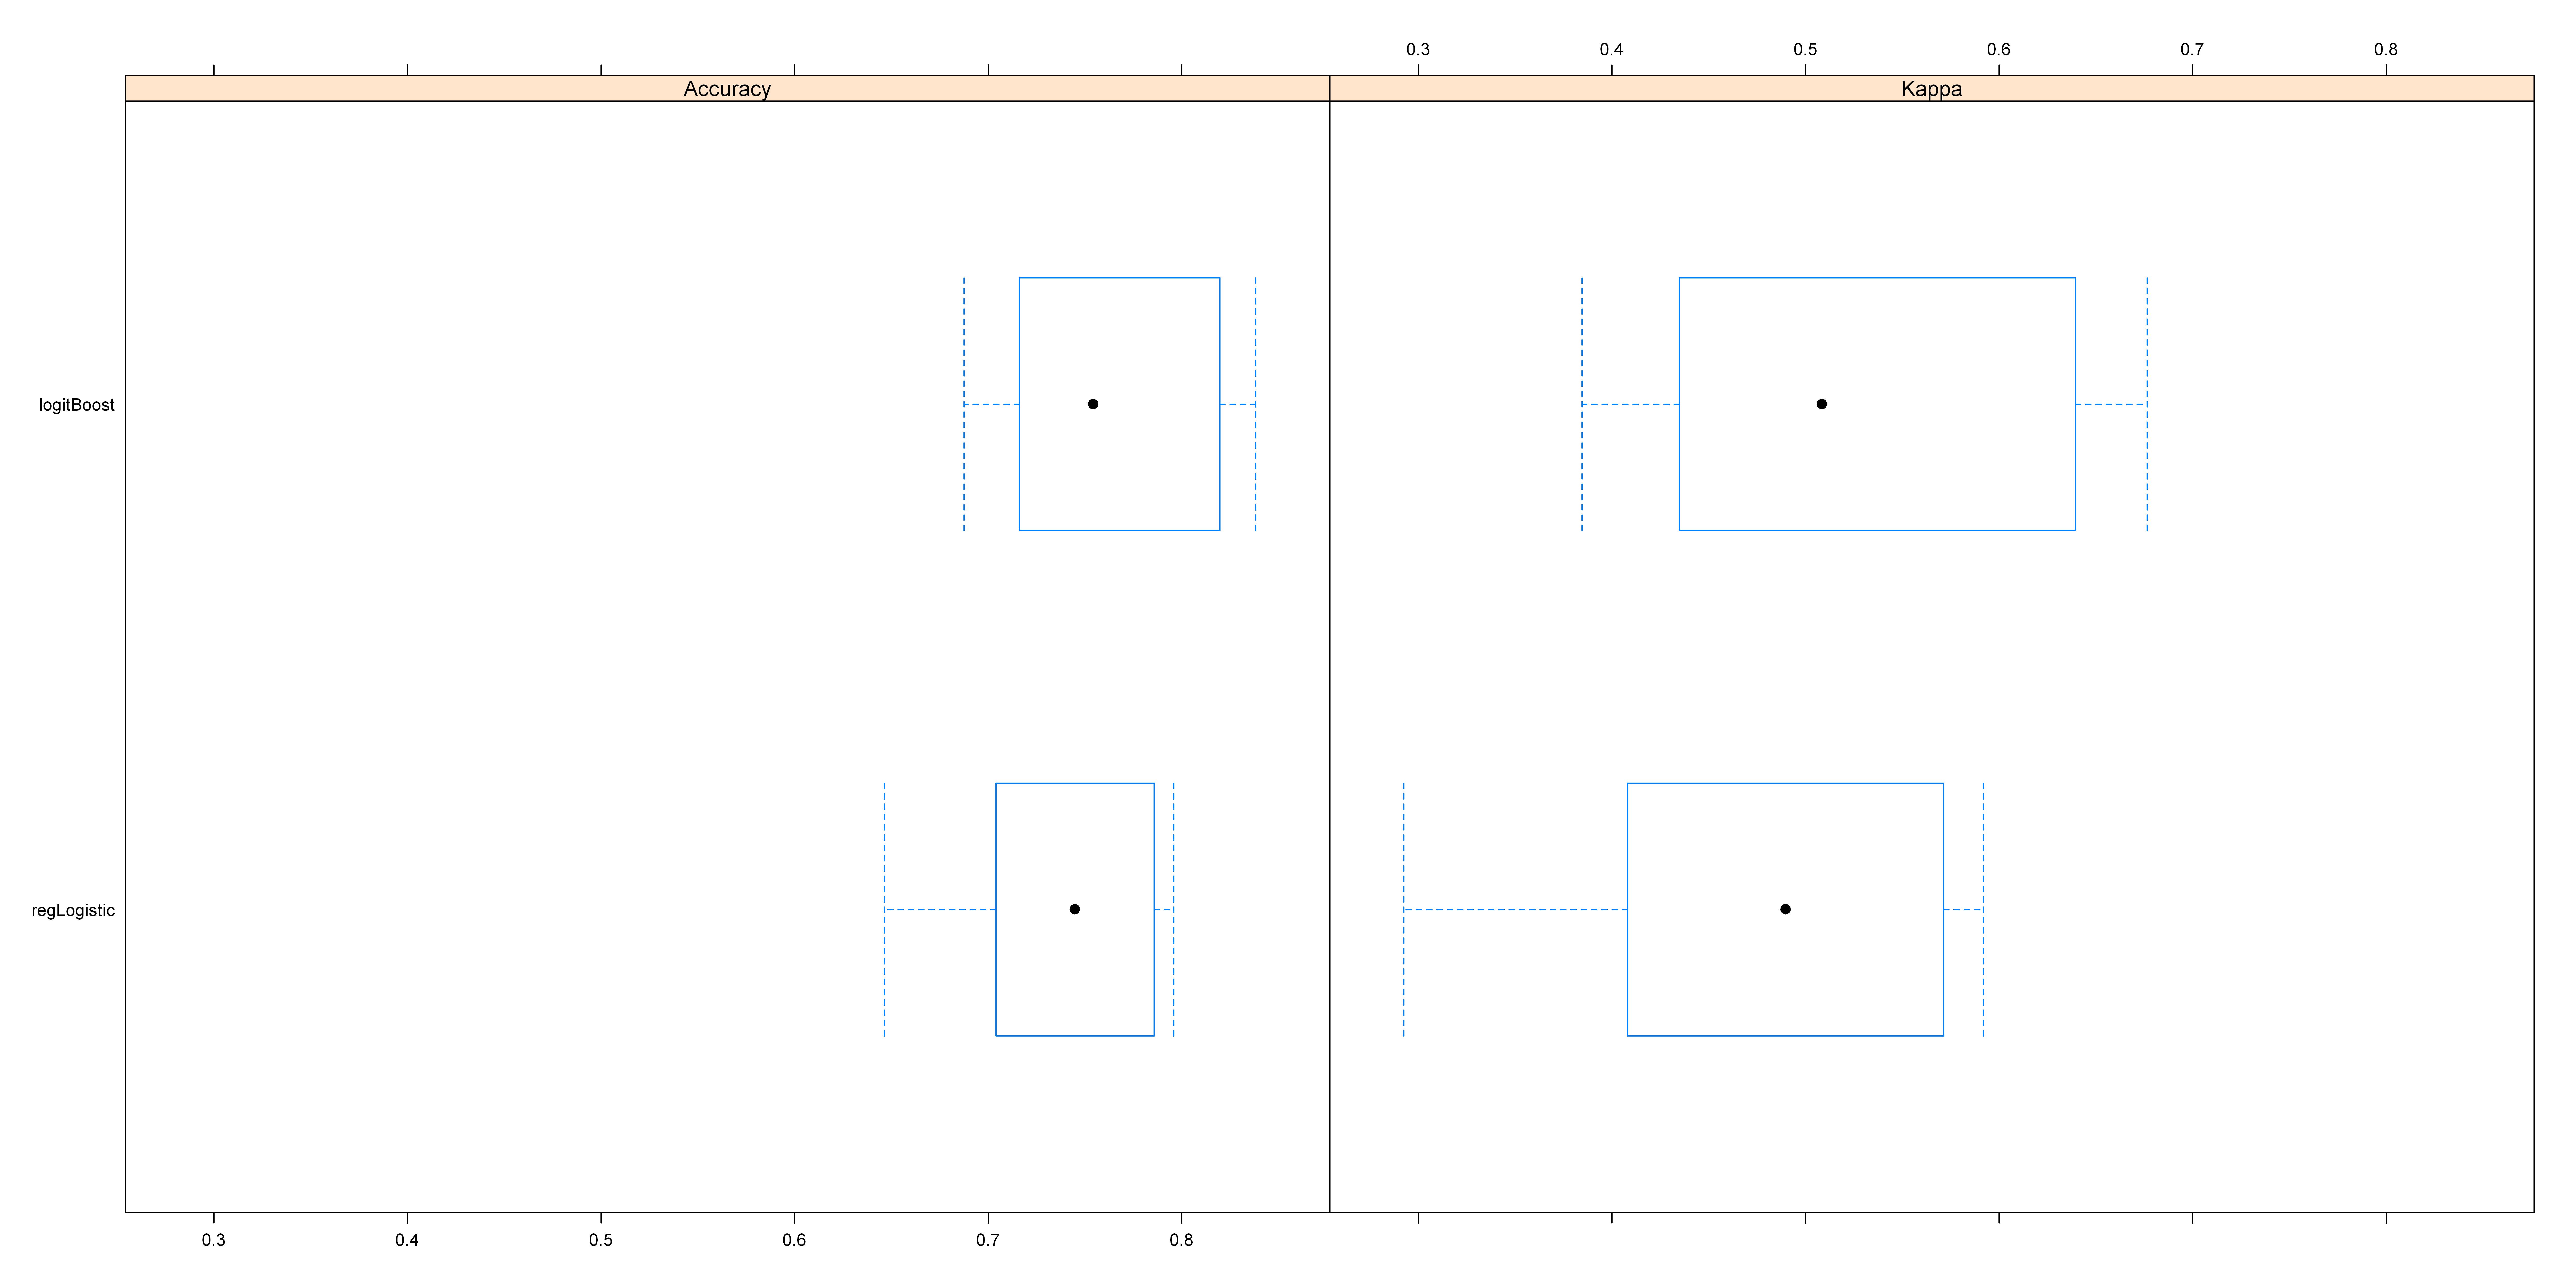

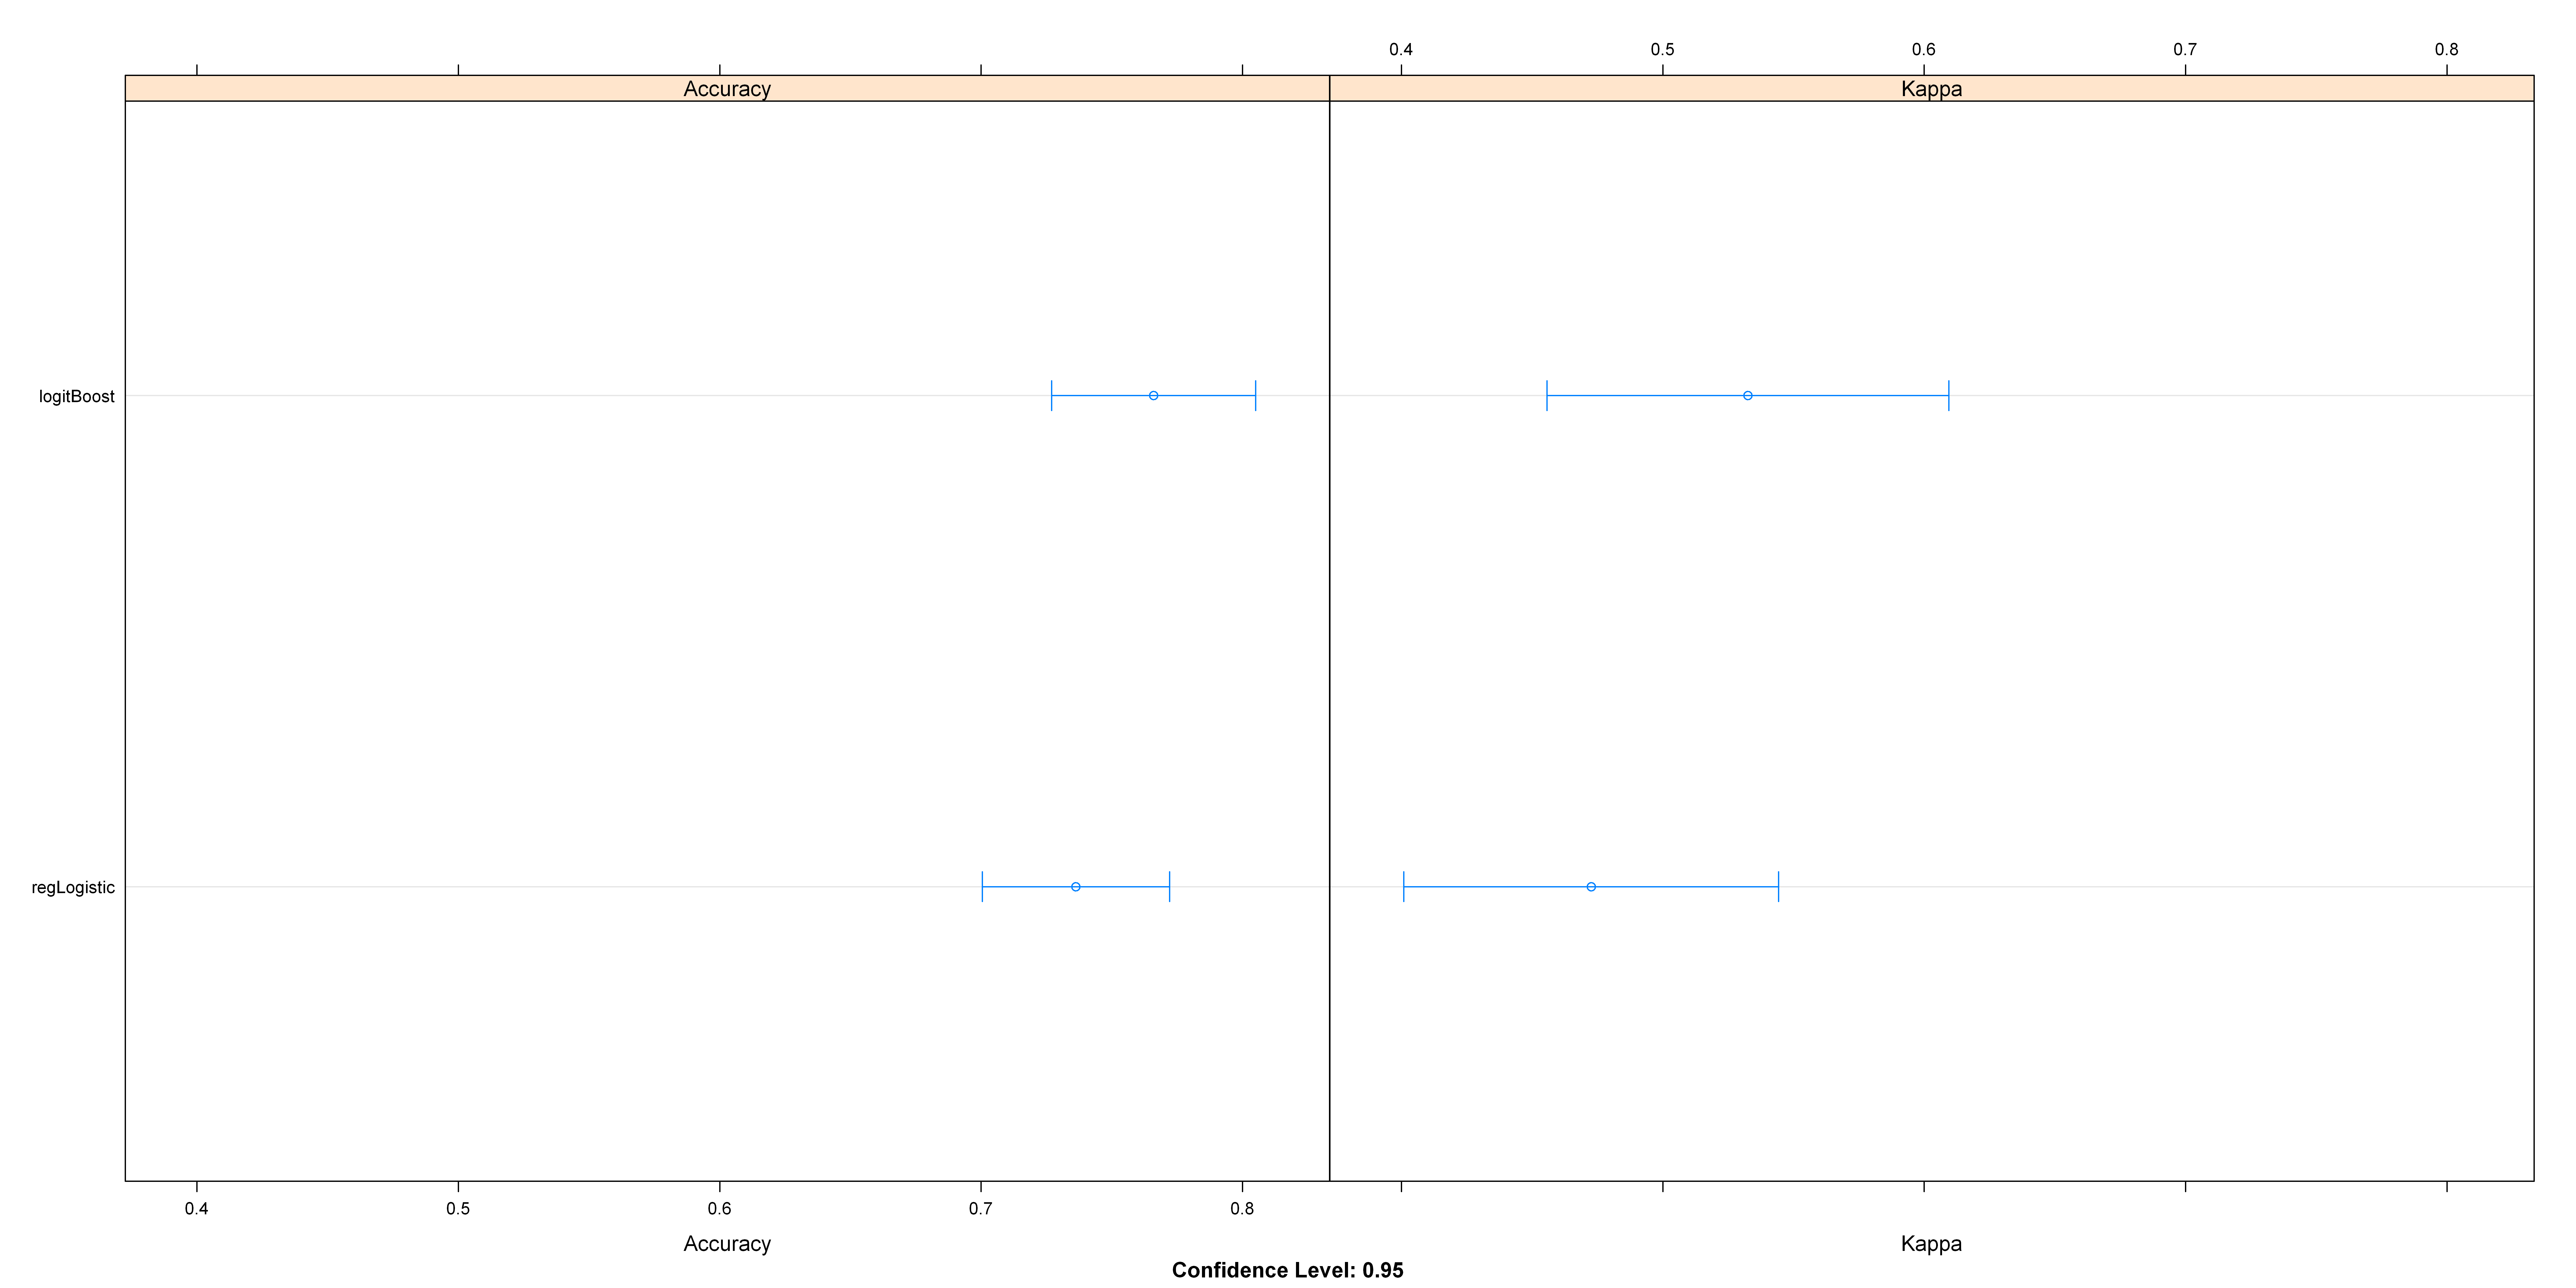

In [62]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

In [63]:
pred_logitBoost <- predict(model_logitBoost,test)   
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      78      17
   NotFast   42     127
                                          
               Accuracy : 0.7765          
                 95% CI : (0.7214, 0.8253)
    No Information Rate : 0.5455          
    P-Value [Acc > NIR] : 4.97e-15        
                                          
                  Kappa : 0.5413          
                                          
 Mcnemar's Test P-Value : 0.001781        
                                          
            Sensitivity : 0.6500          
            Specificity : 0.8819          
         Pos Pred Value : 0.8211          
         Neg Pred Value : 0.7515          
             Prevalence : 0.4545          
         Detection Rate : 0.2955          
   Detection Prevalence : 0.3598          
      Balanced Accuracy : 0.7660          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.6500000            0.8819444            0.8210526 
      Neg Pred Value            Precision               Recall 
           0.7514793            0.8210526            0.6500000 
                  F1           Prevalence       Detection Rate 
           0.7255814            0.4545455            0.2954545 
Detection Prevalence    Balanced Accuracy 
           0.3598485            0.7659722

In [64]:
pred_regLogistic <- predict(model_regLogistic,test)   
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast     113      34
   NotFast   81     193
                                          
               Accuracy : 0.7268          
                 95% CI : (0.6816, 0.7689)
    No Information Rate : 0.5392          
    P-Value [Acc > NIR] : 2.075e-15       
                                          
                  Kappa : 0.4405          
                                          
 Mcnemar's Test P-Value : 1.791e-05       
                                          
            Sensitivity : 0.5825          
            Specificity : 0.8502          
         Pos Pred Value : 0.7687          
         Neg Pred Value : 0.7044          
             Prevalence : 0.4608          
         Detection Rate : 0.2684          
   Detection Prevalence : 0.3492          
      Balanced Accuracy : 0.7163          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5824742            0.8502203            0.7687075 
      Neg Pred Value            Precision               Recall 
           0.7043796            0.7687075            0.5824742 
                  F1           Prevalence       Detection Rate 
           0.6627566            0.4608076            0.2684086 
Detection Prevalence    Balanced Accuracy 
           0.3491686            0.7163472

In [65]:
varImp(model_regLogistic)

ROC curve variable importance

  only 20 most important variables shown (out of 24)

                         Importance
realMELDNa                  100.000
IntraoperativTransfected     78.024
centreCode                   64.093
albumina                     63.059
surgeryDuration              58.839
plasmaPools                  55.541
platCountTranspl             50.859
presentRefractAscites        49.610
ratioPaO2FiO2                48.823
noradrenalineEndSurger       43.774
degenzaPreTra                41.115
EPScum                       37.304
syndromeReperfus             36.429
new_admWard                  35.649
intermedLactates             35.503
albumInfusOver7Days          28.743
organDonorDrawalSodiemia     22.494
plasmaFresco                 18.650
CRIOprecipitated             12.444
nutritStatus                  7.297

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



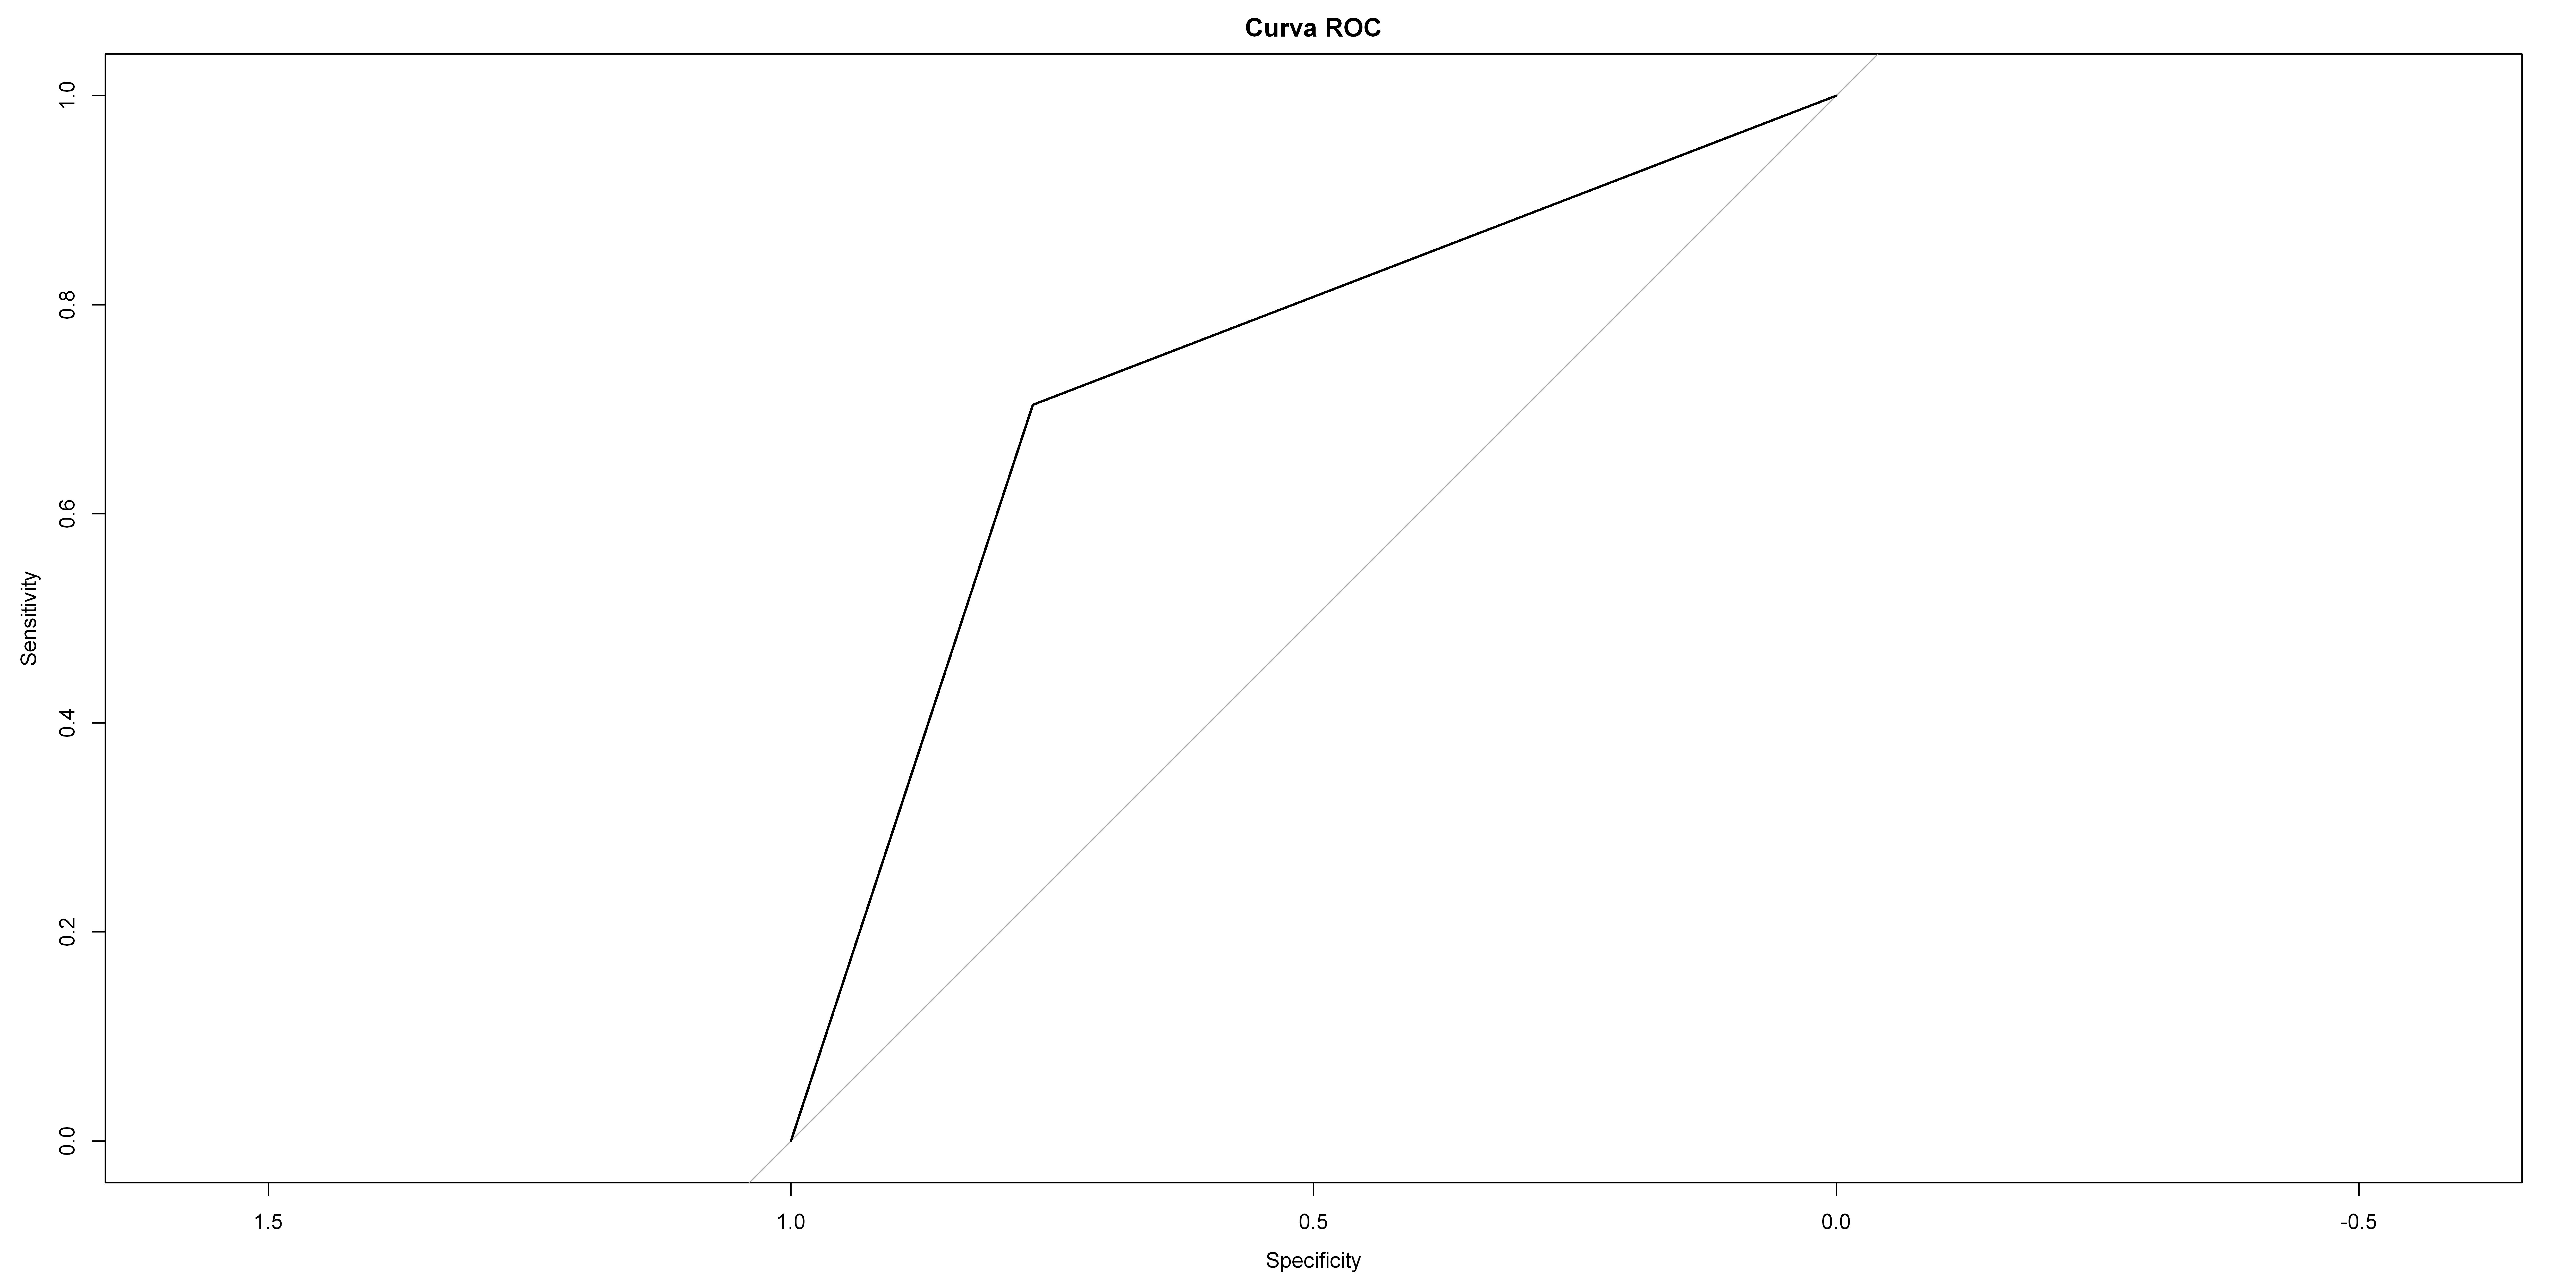

In [66]:
roc_obj <- roc(TestClasses, as.numeric(pred_regLogistic))
plot(roc_obj, main="Curva ROC")

In [67]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_regLogistic))

Data: as.numeric(pred_regLogistic) in 147 controls (TestClasses fast) < 274 cases (TestClasses NotFast).
Area under the curve: 0.7365

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



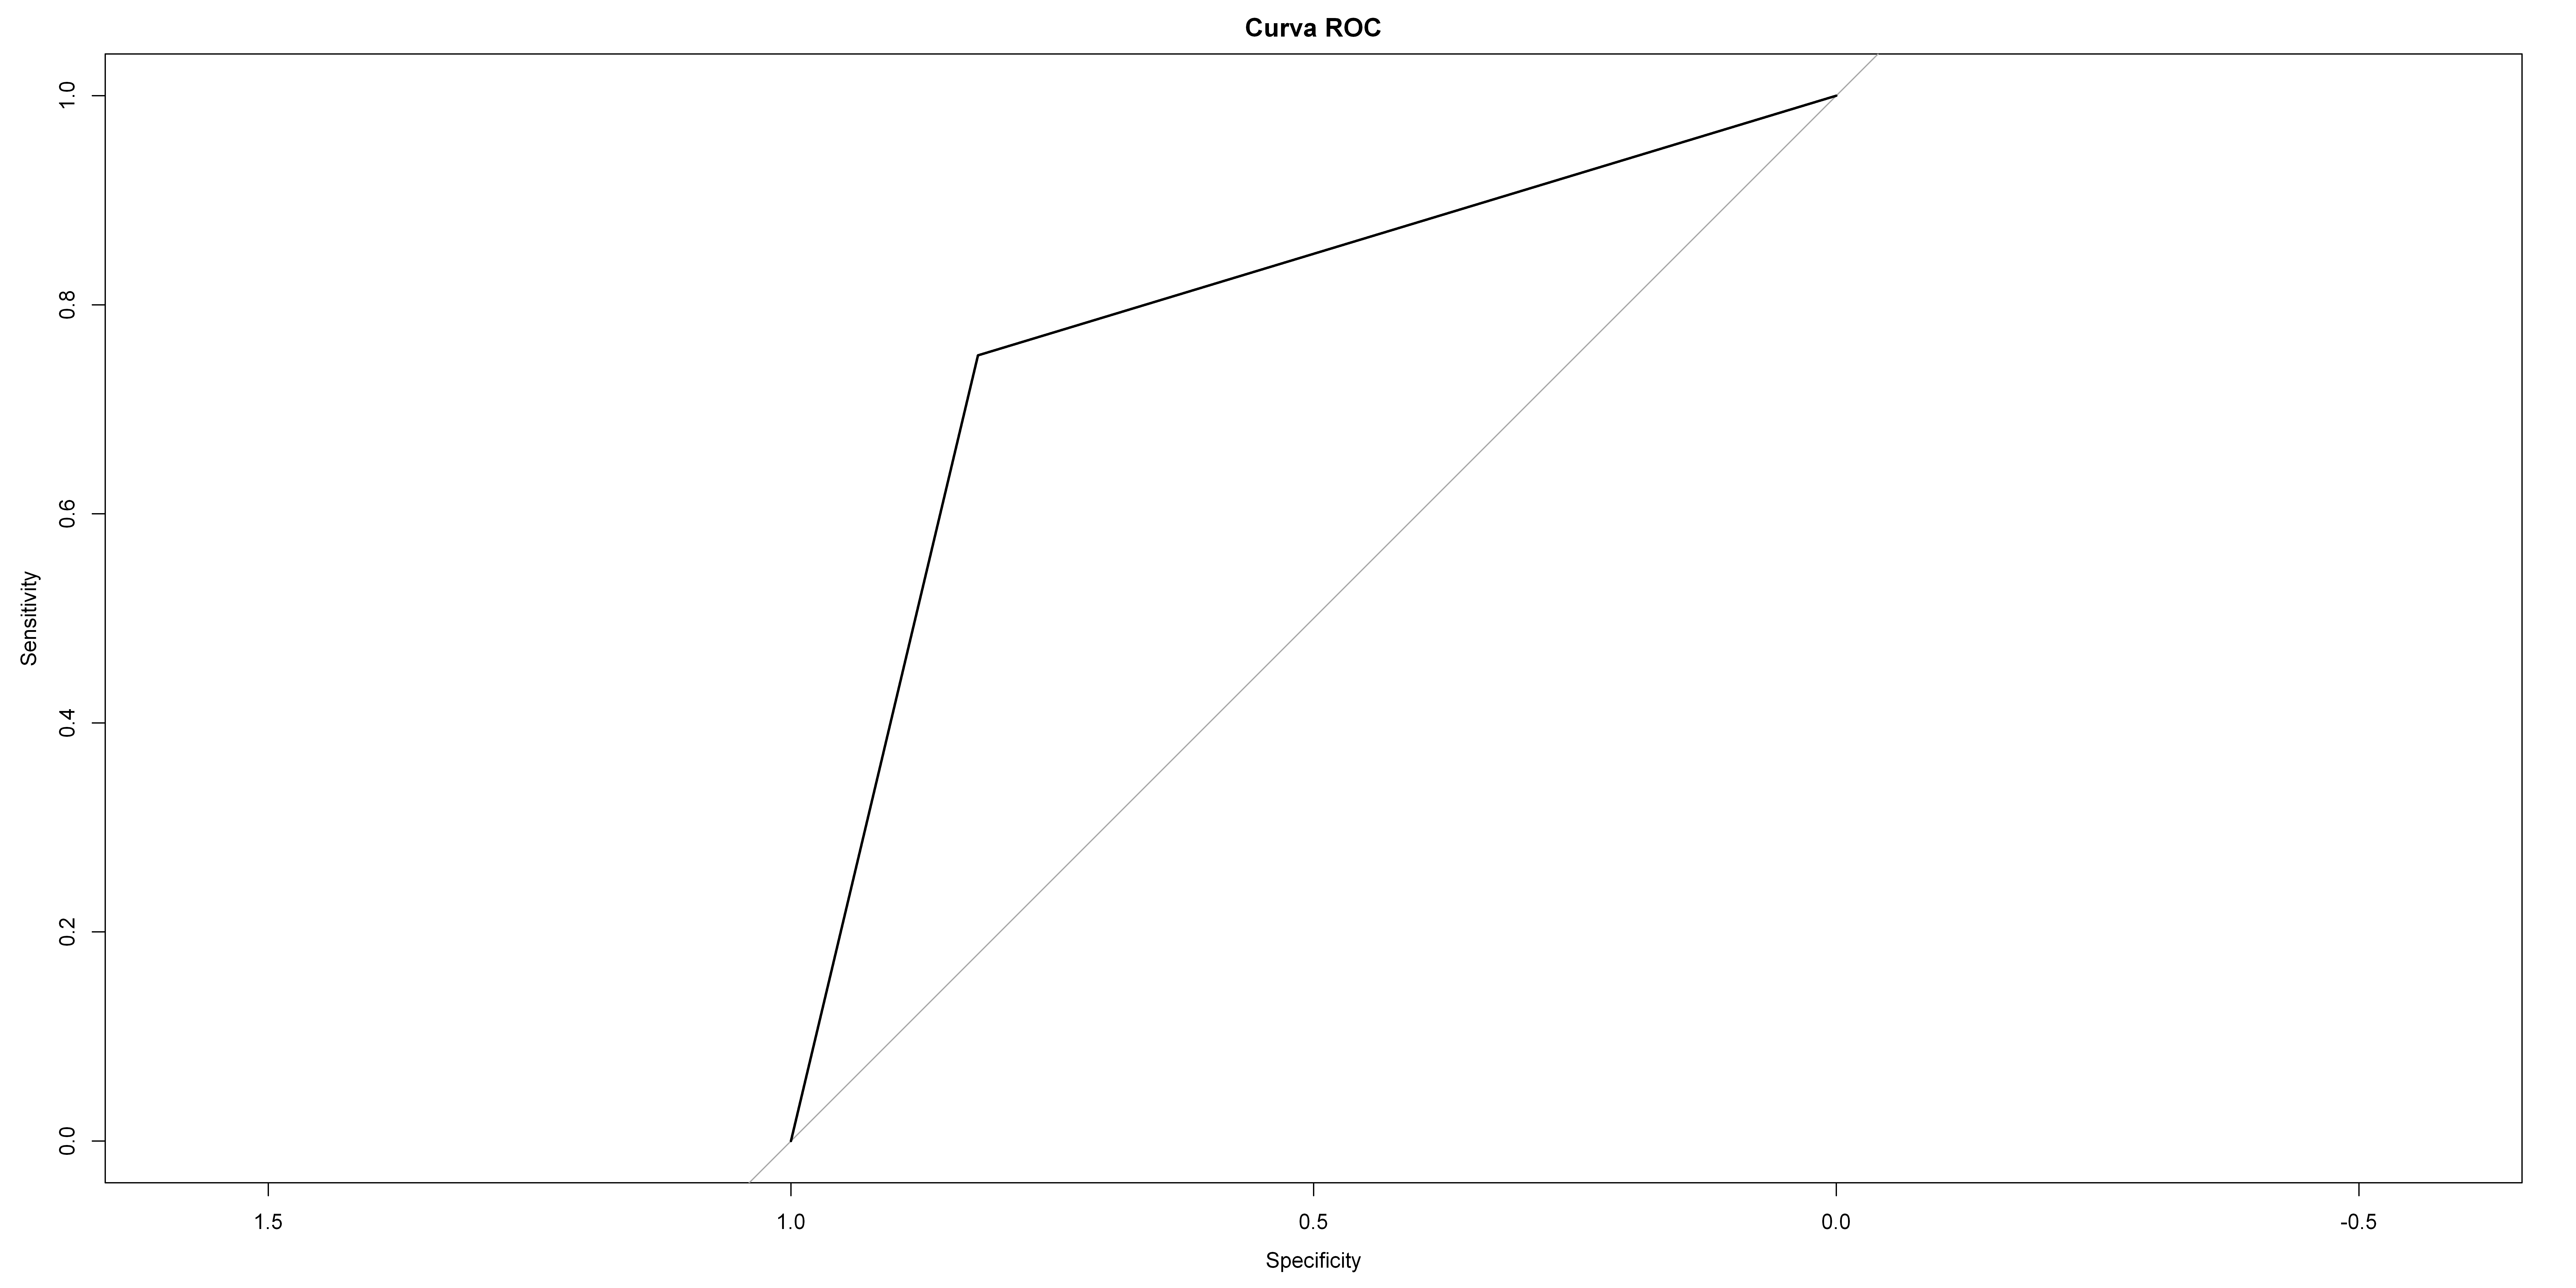

In [68]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [69]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 95 controls (TestClasses fast) < 169 cases (TestClasses NotFast).
Area under the curve: 0.7863